# MODELS TO IMPROVE AUTO INSURANCE CUSTOMER RETENTION
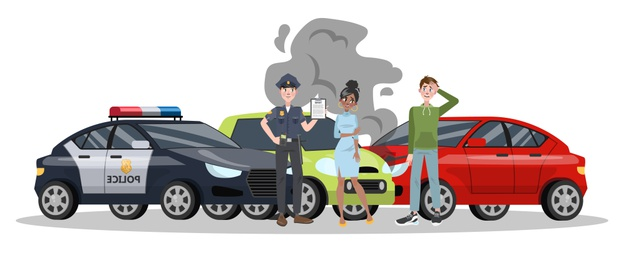

## Objective:
The *IBM-Watson Marketing Customer Valu*e data set contains the results of an auto insurance company's marketing campaign to retain customers by offering customers with expiring policies one of four different renewal proposals.  Unfortunately the purchase response rates to the offers have been low with most renewals denied.  If customers who denied their proposal received one of the other 3 proposals would their response been different? 

The main objective of this analysis will try to answer that question by creating a predictive model that will attempt to pair the customer with the one of four renewal proposals that has the highest probability of being accepted. Along the way, this analysis will also explore the data for  insights about the customers that could lead to better customer retention.

## Highlights:
* Exploratory Data Analysis on Customer Lifetime Value, Renewal Offers and Customer Responses.
* Association Rules Mining (ARM) to discover customer qualities associated with accepting a renewal.
* Random Forest prediction model to pair customers with a renewal offer they are most likely to accept.
* K-Means Cluster Analysis for customer segmentation.
* Decision Tree Classification to identify potential Customer Lifetime Value.

In [1]:
# Load necessary packages
library(rapportools)
library(tidyverse)
library(ggplot2)
library(RColorBrewer)
library(gridExtra)
library(corrplot)
library(corrgram)
library(arules)
library(arulesViz)
library(dplyr)
library(caret)
library(dplyr)
library(ggraph)
library(igraph)
require(tidyverse)
library(factoextra)
library(cluster)
library(purrr)
library(rpart)
library(rattle)

Loading required package: reshape


Attaching package: ‘rapportools’


The following objects are masked from ‘package:stats’:

    IQR, median, sd, var


The following objects are masked from ‘package:base’:

    max, mean, min, range, sum


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks reshape::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::n()      masks rapportools::n()
✖ dplyr::rename() masks reshape::rename()


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


corrplot 0.84 loaded

Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust gclus

Loading required package: M

## About the Data
The data has 9134 customer records with 24 variables (14 policy profile variables and 10 customer profile variables). All customers in the data have policies expiring between Jan 1 to Feb 28, 2011. Definitions for each variable are provided below.

**Policy Profile Variables **     

* Customer:                      Customer ID number
* Customer Lifetime Value:       Customer's total worth to business over life of the relationship
* Response:                      Yes or No response to a renewal offer
* Coverage:                      Type of policy (Basic, Extended, Premium)
* Monthly Premium Auto:          Amount of customers' monthly insurance payments
* Months Since Last Claim:       Number of months between customers' last reported insurance claim
* Months Since Policy Inception: Number of months since customer began an insurance policy
* Number of Open Complaints:     Number of unresolved customer complaints
* Number of Policies:            Number of policies customer currently owns
* Policy Type:                   (Corporate Auto, Personal Auto, Special Auto)
* Policy:                        3 levels (L1, L2, L3) per Policy Type (Corporate, Personal, Special)
* Renew Offer Type:              4 types of renewal offers (Offer 1, Offer 2, Offer 3, Offer 4)
* Sales Channel:                 Channels to purchase a policy (Agent, Branch, Call Center, Web)
* Total Claim Amount:            Cummulative amount of claims since policy inception

**Customer Profile Variables **

* State:                        State of residence or business
* Education:                    Level of education (High School or less, College, BA, MA , PHD)
* Effective To Date:            Date the policy expires
* Employment Status:            (Employed, Unemployed, Retired, Disabled, Medical Leave)
* Gender:                       Male or Female
* Income:                       Customers' annual income
* Location Code:                (Rural, Suburban, Urban)
* Marital Status:               (Single, Married, Divorced)
* Vehicle Class:                Type of vehicle (4-Door, Luxury, Luxury SUV, Sports Car, SUV, 2-Door)
* Vehicle Size:                 (Large, Midsize, Small)

In [2]:
# Load the data into object auto
auto <- read.csv("../input/ibm-watson-marketing-customer-value-data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

# Inspect Data Structure
str(auto)

'data.frame':	9134 obs. of  24 variables:
 $ Customer                     : Factor w/ 9134 levels "AA10041","AA11235",..: 601 5947 97 8017 2489 4948 8434 756 1352 548 ...
 $ State                        : Factor w/ 5 levels "Arizona","California",..: 5 1 3 2 5 4 4 1 4 4 ...
 $ Customer.Lifetime.Value      : num  2764 6980 12887 7646 2814 ...
 $ Response                     : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 2 2 1 2 1 ...
 $ Coverage                     : Factor w/ 3 levels "Basic","Extended",..: 1 2 3 1 1 1 1 3 1 2 ...
 $ Education                    : Factor w/ 5 levels "Bachelor","College",..: 1 1 1 1 1 1 2 5 1 2 ...
 $ Effective.To.Date            : Factor w/ 59 levels "1/1/11","1/10/11",..: 48 25 42 13 53 18 48 10 19 40 ...
 $ EmploymentStatus             : Factor w/ 5 levels "Disabled","Employed",..: 2 5 2 5 2 2 2 5 3 2 ...
 $ Gender                       : Factor w/ 2 levels "F","M": 1 1 1 2 2 1 1 2 2 1 ...
 $ Income                       : int  56274 0 48767 0 43836 6290

In [3]:
# Inspect Data Summary
summary(auto)

    Customer           State      Customer.Lifetime.Value Response  
 AA10041:   1   Arizona   :1703   Min.   : 1898           No :7826  
 AA11235:   1   California:3150   1st Qu.: 3994           Yes:1308  
 AA16582:   1   Nevada    : 882   Median : 5780                     
 AA30683:   1   Oregon    :2601   Mean   : 8005                     
 AA34092:   1   Washington: 798   3rd Qu.: 8962                     
 AA35519:   1                     Max.   :83325                     
 (Other):9128                                                       
     Coverage                   Education    Effective.To.Date
 Basic   :5568   Bachelor            :2748   1/10/11: 195     
 Extended:2742   College             :2681   1/27/11: 194     
 Premium : 824   Doctor              : 342   2/14/11: 186     
                 High School or Below:2622   1/26/11: 181     
                 Master              : 741   1/17/11: 180     
                                             1/19/11: 179     
       

In [4]:
# Check for missing, NA and duplicated data
sum(is.na(auto))
nrow(auto[duplicated(auto),])

[1] 0

[1] 0

## **Adding Discretized Columns**
Discretizing data essentially transforms continuous data into categorical data through the process of placing a range of values into a defined bucket or bin. The following variables were discretized with results placed into new columns. See code for bin definitions.
* CLV
* Income
* Monthly Premium Auto
* Total Claim Amount

Below are the first 10 rows comparing the discretized data to its original values. 

In [5]:
# Change Effective to Date data type from factor to date
auto$Effective.To.Date <- as.Date(auto$Effective.To.Date, format = "%m/%d/%y")

# Discretize the following nominal variables as new columns

# Add Cutomer Lifetime Value bins as new column
auto$CLV_Bins <- cut(auto$Customer.Lifetime.Value, 
                       breaks = c(0,1999,3999,5999,7999,9999,Inf),
                       labels = c("< $2000", "$2000-3999"," $4000-5999",
                                  " $6000-7999", " $8000-9999", "$10000+"))
# Add Income bins as new column
auto$IncomeBin <- cut(auto$Income, breaks = c(0,14999,29999,44999,59999,74999,Inf),
                    labels = c("< $15000", "$15000-29999","$30000-44999",
                               "$45000-59999", "$60000-74999", "$75000+"))

# Add Monthly Premium bins as new column
auto$MoPremiumBin <- cut(auto$Monthly.Premium.Auto, 
                            breaks = c(0,74,99,124,149,Inf),
                            labels = c("< $75", "$75-99","$100-124","$125-149","$150+"))

# Add Total Claim bins as new column
auto$ClaimBin <- cut(auto$Total.Claim.Amount, 
                        breaks = c(0,249,499,749,999,Inf),
                        labels = c("< $250", "$250-499","$500-749","$750-999","$1000+"))

# Replace NA in IncomeBin with "< $15000"
auto$IncomeBin[is.na(auto$IncomeBin)] <- "< $15000"

# spot check bin allocations
head(auto[,c(3, 25,10,26, 13, 27, 22, 28)],10)

Customer.Lifetime.Value CLV_Bins    Income IncomeBin    Monthly.Premium.Auto
1   2763.519               $2000-3999  56274  $45000-59999  69                 
2   6979.536                $6000-7999     0  < $15000      94                 
3  12887.432               $10000+     48767  $45000-59999 108                 
4   7645.862                $6000-7999     0  < $15000     106                 
5   2813.693               $2000-3999  43836  $30000-44999  73                 
6   8256.298                $8000-9999 62902  $60000-74999  69                 
7   5380.899                $4000-5999 55350  $45000-59999  67                 
8   7216.100                $6000-7999     0  < $15000     101                 
9  24127.504               $10000+     14072  < $15000      71                 
10  7388.178                $6000-7999 28812  $15000-29999  93                 
   MoPremiumBin Total.Claim.Amount ClaimBin
1  < $75         384.8111          $250-499
2  $75-99       1131.4649          $1000+  
3  $100-124      566.4722          $500-749
4  $100-124      529.8813          $500-749
5  < $75         138.1309          < $250  
6  < $75         159.3830          < $250  
7  < $75         321.6000          $250-499
8  $100-124      363.0297          $250-499
9  < $75         511.2000          $500-749
10 $75-99        425.5278          $250-499

## **Exploratory Data Analysis (EDA)**

In [6]:
# Customized themes to format ggplot graphs in EDA
MyTheme <- theme(axis.text = element_text(size = 18), 
          axis.title = element_text(size = 20, face ="bold"), 
          plot.title = element_text(size = 24, face = "bold"))
# MyTheme2 <- theme(axis.text = element_text(size = 10), 
#                   axis.title = element_text(size = 18, face ="bold"), 
#                   plot.title = element_text(size = 20, face = "bold"), 
#                   axis.text.x = element_text(angle = 90))
# MyTheme3 <- theme(axis.text = element_text(size = 12), 
#           axis.title = element_text(size = 14, face ="bold"), 
#           plot.title = element_text(size = 16, face = "bold"))

figsize <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}

## **Customer Lifetime Value**

Customer Lifetime Value (CLV) is a measure of a customer's total worth to a business over the entire time period of the customer-business relationship. By developing strategies to reduce client churn, policy term businesses can increase the overall CLV of its clients.  Higher retention also leads to lower costs and better profit margins as retaining existing customers often costs less than acquiring new ones. 

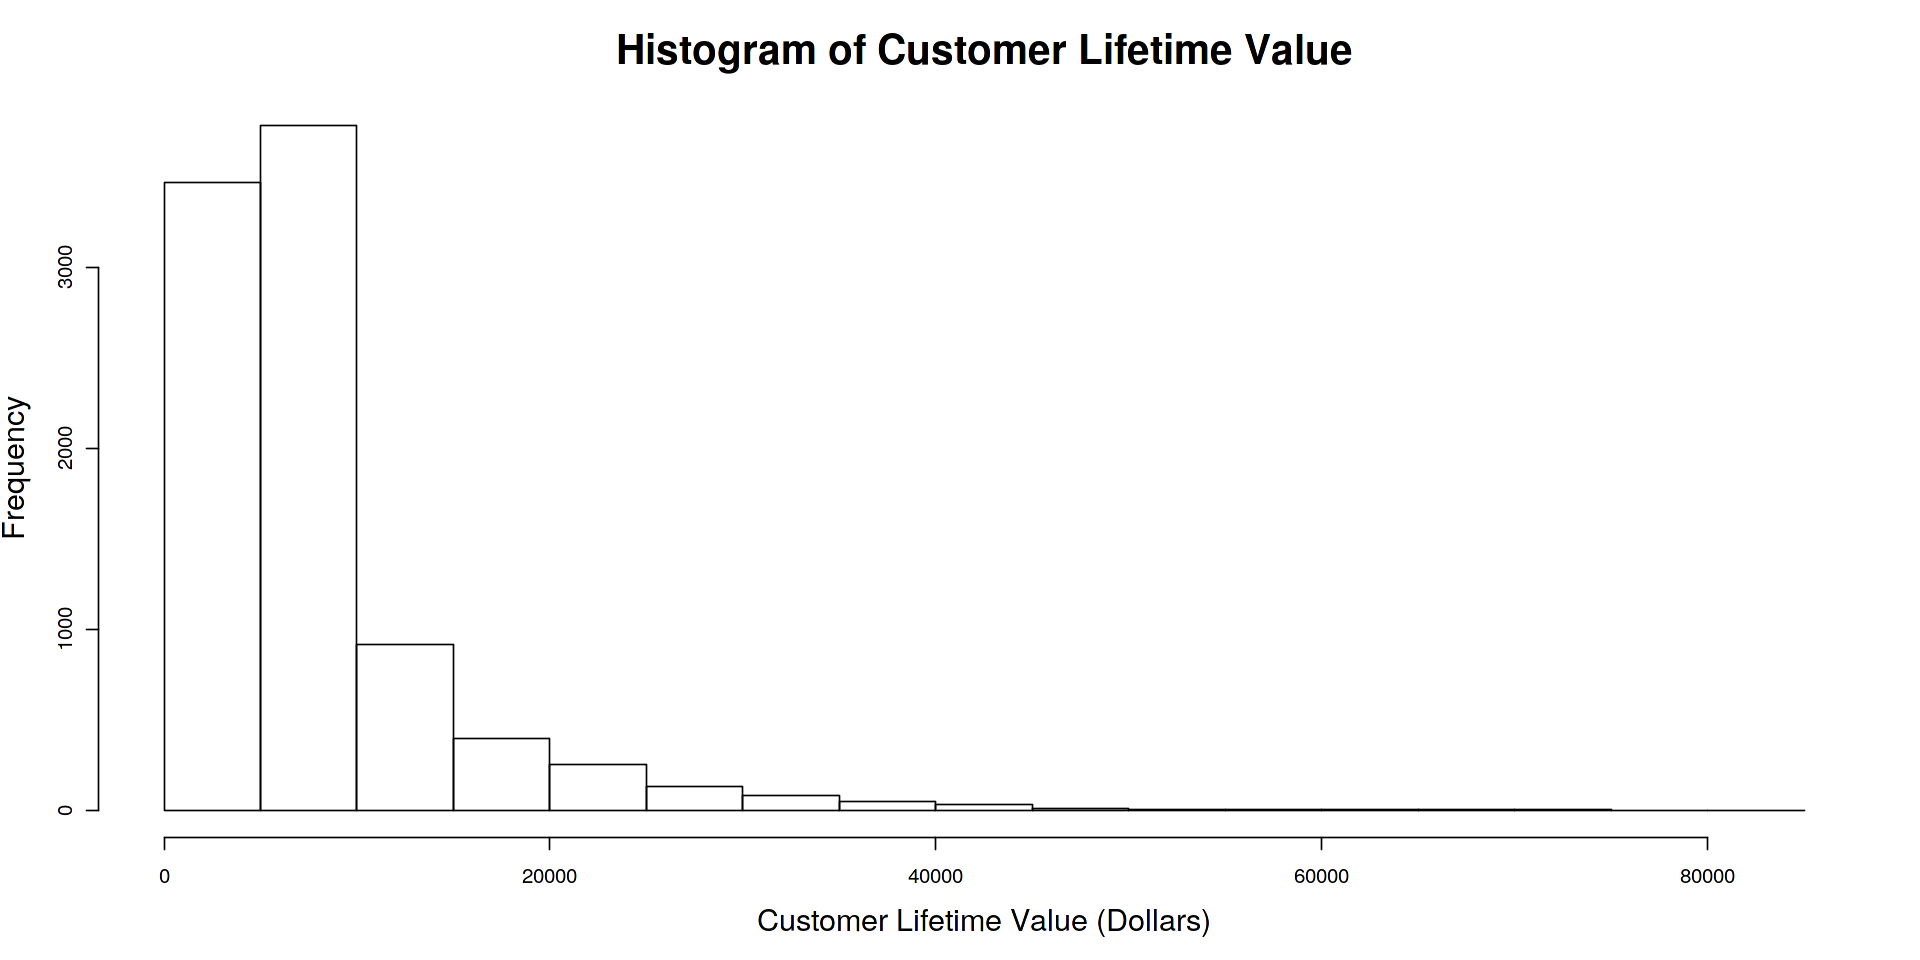

In [7]:
figsize(16,8)

# Histogram of CLV
hist(auto$Customer.Lifetime.Value, main = "Histogram of Customer Lifetime Value", xlab = "Customer Lifetime Value (Dollars)",
    cex.main = 2, cex.lab = 1.5)  


In [8]:
# Reexamine CLV summary
summary(auto$Customer.Lifetime.Value)
# Check CLV standard deviation
sd(auto$Customer.Lifetime.Value)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1898    3994    5780    8005    8962   83325 

[1] 6870.968

Customer Lifetime Values (CLV) ranges from 1,898 to 83,325 with a median of 5,780 and a standard deviation of 6,871 (rounded). The mean CLV of 8,005 is greater than the median indicating a right skewed distribution with a decreasing number of customers as CLV increases. 

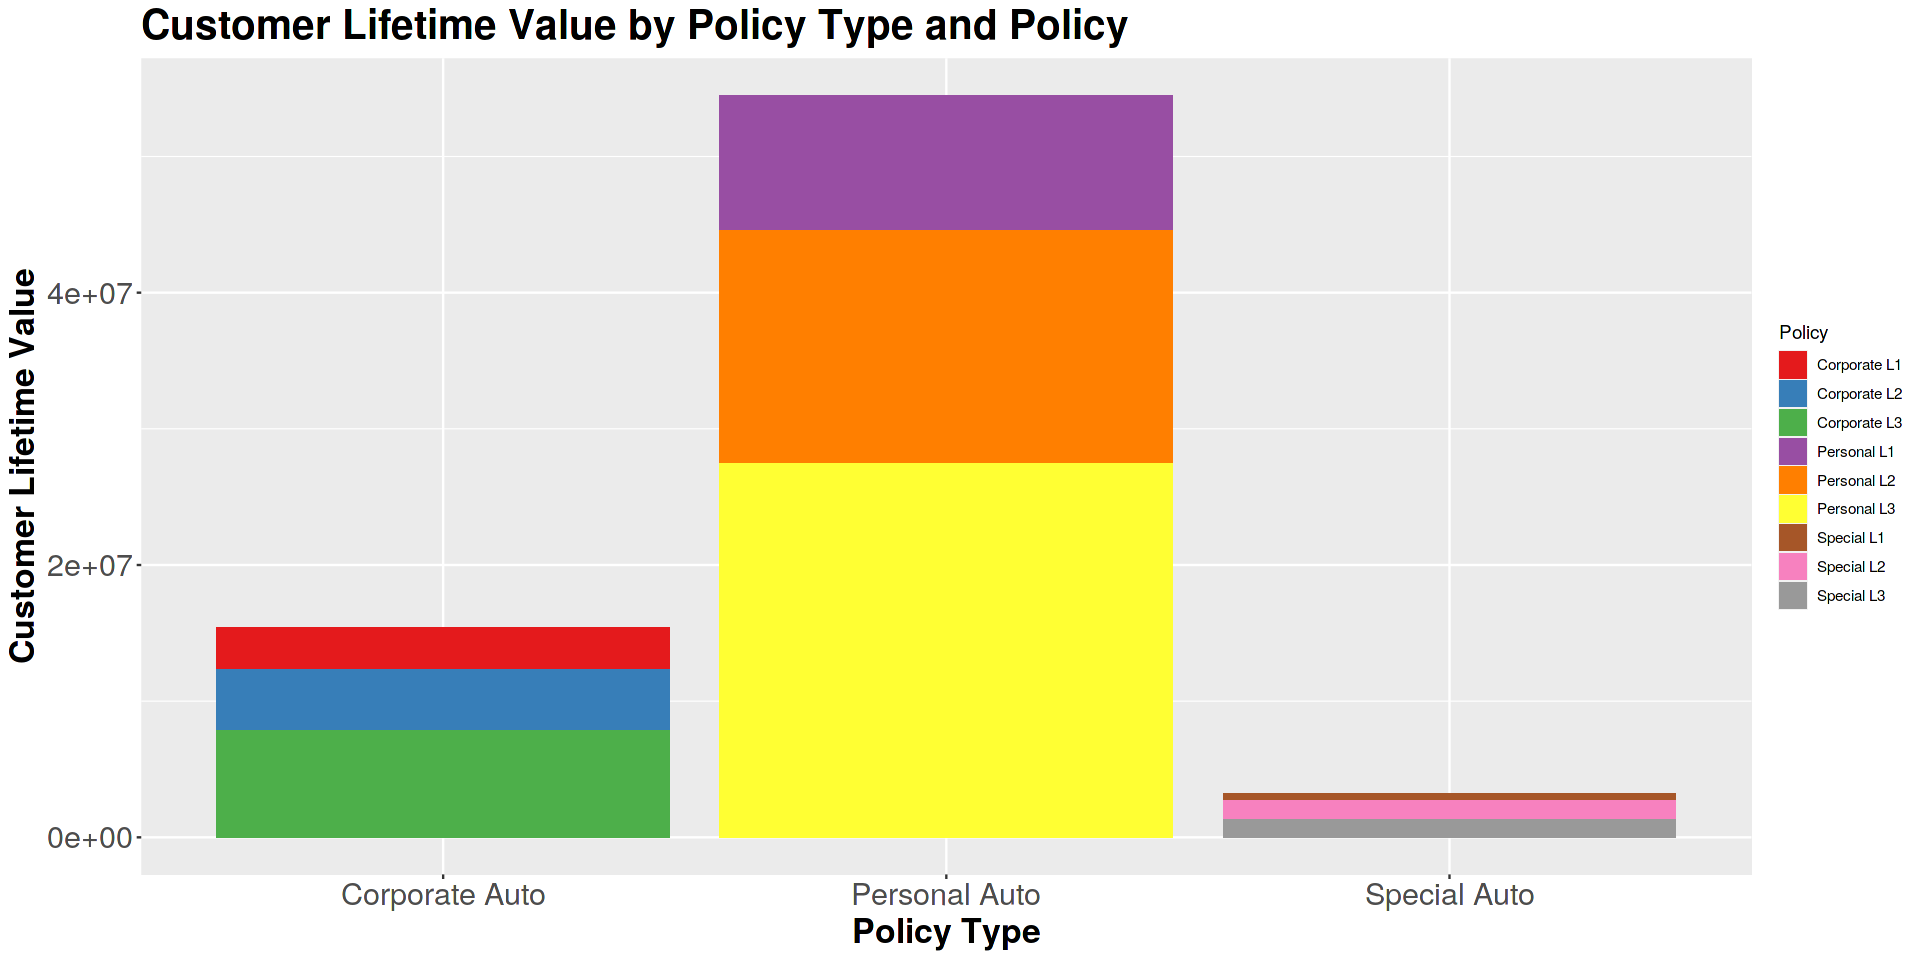

In [9]:
# Column plot of CLV by Policy Type and Policy
CLV_PolicyType <- ggplot(auto, aes(x=Policy.Type, y=Customer.Lifetime.Value, fill = Policy ))+
        geom_col() + xlab("Policy Type") + ylab("Customer Lifetime Value") +
        ggtitle("Customer Lifetime Value by Policy Type and Policy") +
         scale_fill_brewer(palette = "Set1") + MyTheme
CLV_PolicyType

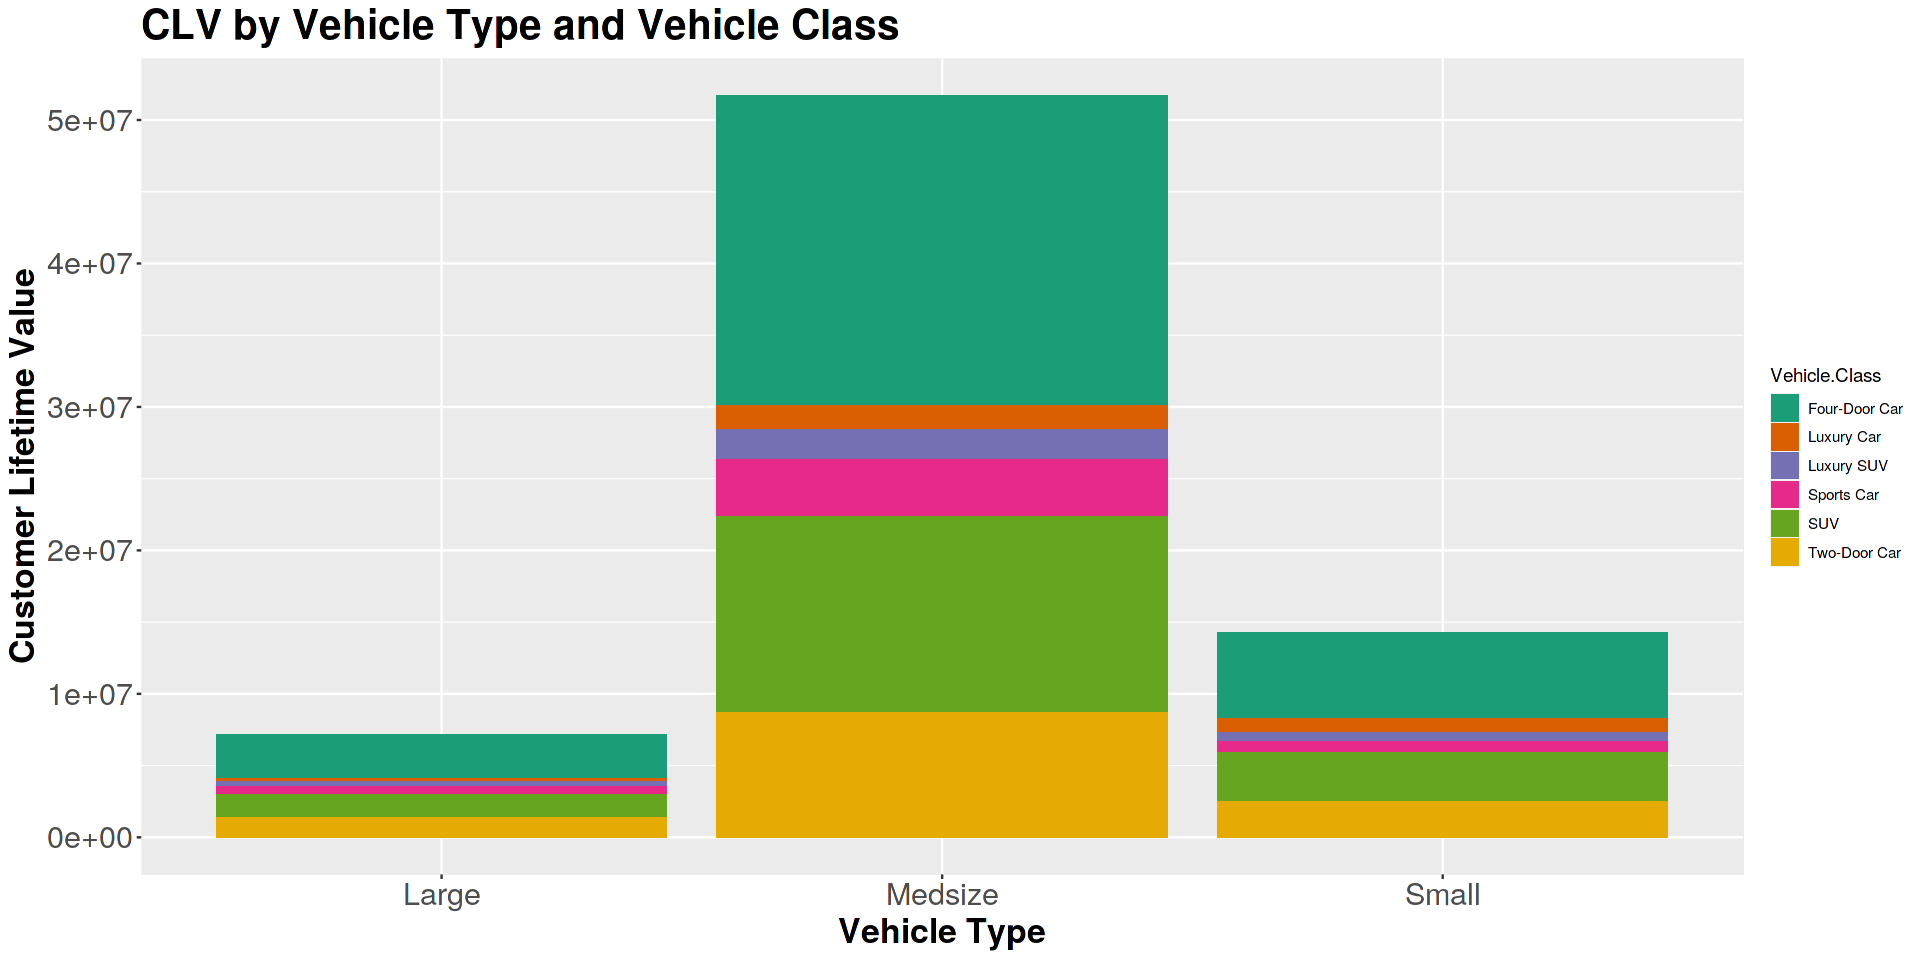

In [10]:
# Plot CLV by Vehicle Type and Vehicle Class
CLV_Vehicle <- ggplot(auto, aes(x=Vehicle.Size, y=Customer.Lifetime.Value, 
              fill = Vehicle.Class ))+geom_col() + 
        xlab("Vehicle Type") + ylab("Customer Lifetime Value") + 
        ggtitle("CLV by Vehicle Type and Vehicle Class") +
        scale_fill_brewer(palette = "Dark2") + MyTheme
        
CLV_Vehicle

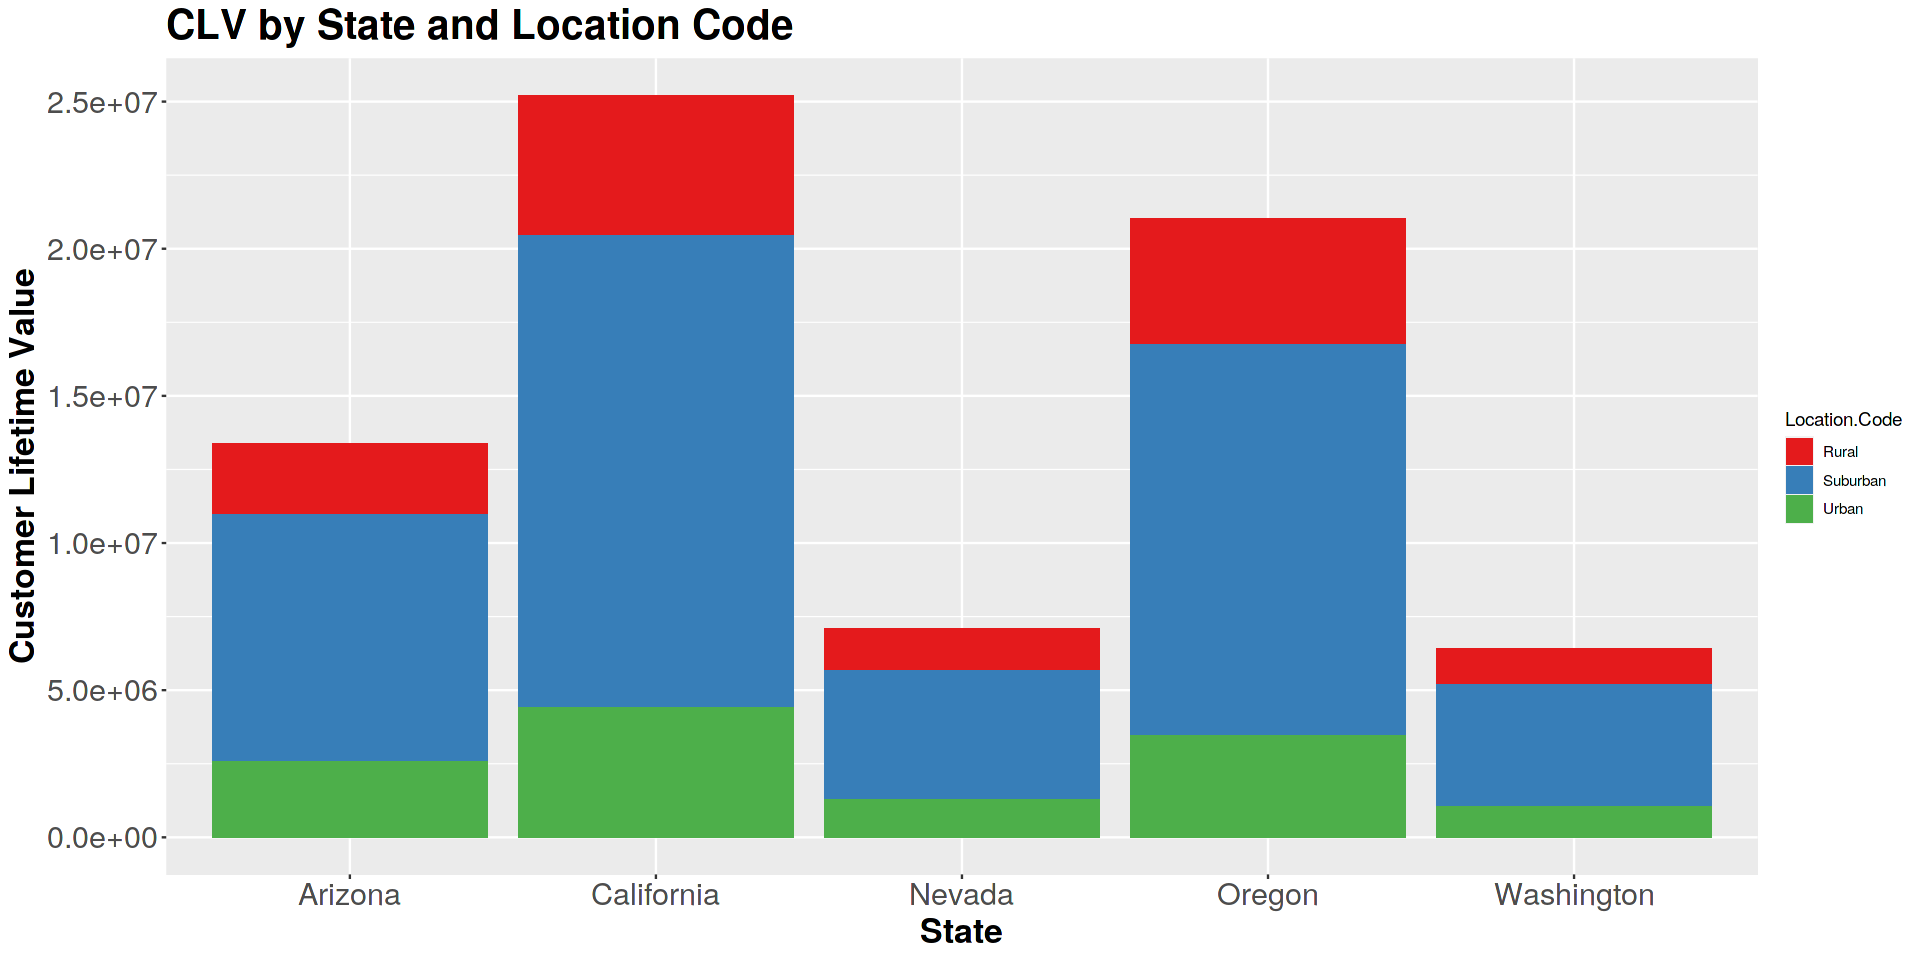

In [11]:
# Plot CLV by State and Location Code
CLV_Region <- ggplot(auto, aes(x=State, y=Customer.Lifetime.Value, 
              fill = Location.Code ))+geom_col() + 
        xlab("State") + ylab("Customer Lifetime Value") +
        ggtitle("CLV by State and Location Code") +
        scale_fill_brewer(palette = "Set1") + MyTheme
        
CLV_Region

In [12]:
# Plot CLV by Marital Status and Gender
CLV_Marital <- ggplot(auto, aes(x=Marital.Status, y=Customer.Lifetime.Value, 
              fill = Gender ))+geom_col() + 
        xlab("Marital Status") + ylab("Customer Lifetime Value") +
        ggtitle("CLV by Marital Status and Gender") +
        scale_fill_brewer(palette = "Set1") + MyTheme
        
CLV_Marital

In [13]:
# Check for correlations between CLV and Policy Profile variables
# Create data frame with only CLV and Policy Profile variables
autoCorr <- auto[,c(3,10,13:17,22)]
colnames(autoCorr) <- c("CLV", "Income", "Mon. Premium", "Mon Since Claim", "Mons Since Inception",
                        "Open Complaints", "Num of Poicies", "Total Claim Amt.")
autoCorr <- cor(autoCorr)
# Plot the correlation table
corrplot(autoCorr, method = "color", order = "hclust")

Customer Lifetime Value (CLV) shows highest positive correlations with Monthly Premiums and Total Claim Amounts.  Will take deeper dive to examine those correlations in a scatter plot.

In [14]:
# Plot scatterplot between CLV and Monthly Premium 
# along with Number of Open Complaints and Months Since Last Claim
ggplot(auto, aes(x=Monthly.Premium.Auto, y=Customer.Lifetime.Value)) + 
  geom_point(aes(col = as.factor(Number.of.Open.Complaints), size = Months.Since.Last.Claim),alpha = 0.6) +
  scale_color_brewer(palette="Spectral", name = "Number of Open Complaints") + xlab("Monthly Premium") + 
  ylab("Customer Lifetime Value") + ggtitle("Key Factors to Customer Lifetime Value") + MyTheme
 

Supposing a CLV greater than or equal to 20000 were defined as a "High CLV", Customers with higher monthly premiums and low open complaints (<3 depicted in the colors yellow, pink and red) and no recent claims (last claims > 20 months depicted by size of circle) would have a higher likelihood of falling in the "High CLV" definition. 

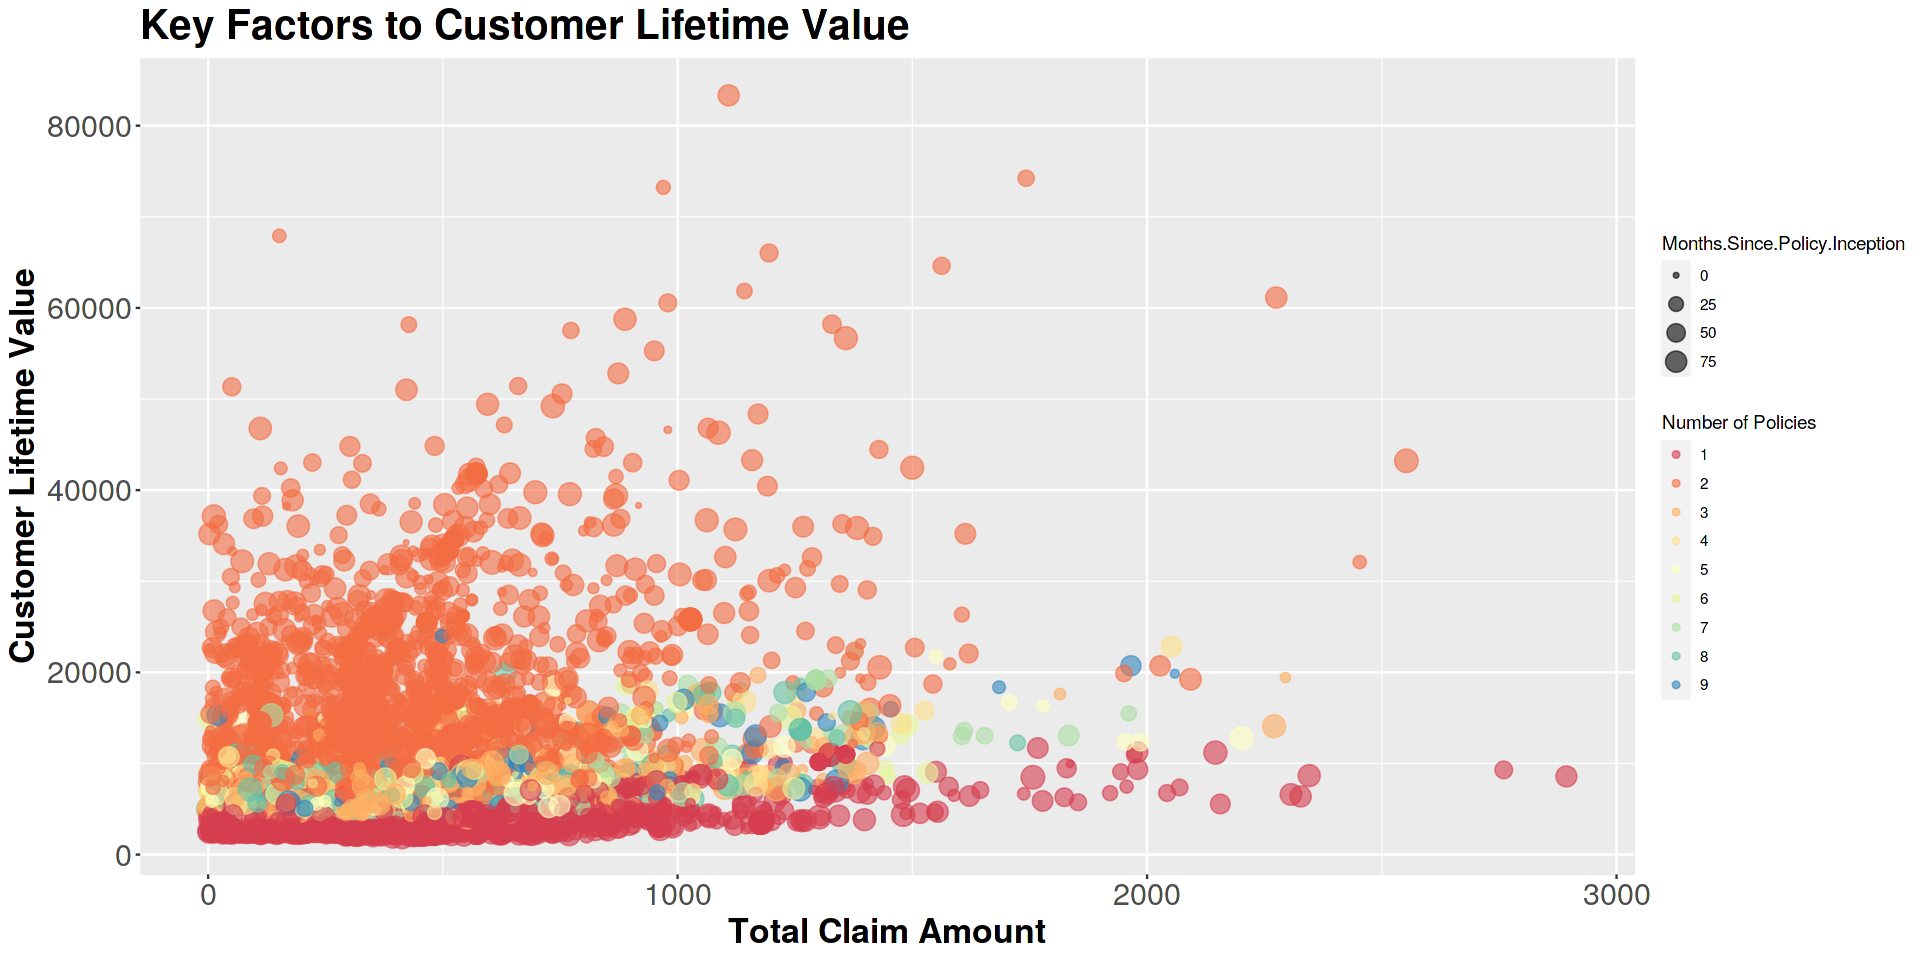

In [15]:
# Plot scatterplot between CLV and Total Claim Amounts 
# along with Number of Policies and Months Since Policy Inception
ggplot(auto, aes(x=Total.Claim.Amount, y=Customer.Lifetime.Value)) + 
  geom_point(aes(col = as.factor(Number.of.Policies), size = Months.Since.Policy.Inception), alpha = 0.6) +
  scale_color_brewer(palette="Spectral", name = "Number of Policies") + xlab("Total Claim Amount") + 
  ylab("Customer Lifetime Value") + ggtitle("Key Factors to Customer Lifetime Value") + MyTheme
 

Under the same "High CLV" definition from previous graph, Customers with lower Total Claim Amounts with at least 2 policies and more than 25 months since policy inception would have a higher likelihood of falling in the "High CLV" definition. 

### CLV TakeAway
* Married individuals with midsize cars and personal policies make up the bulk of customers.
* Strong positive correlation between Customer Lifetime Value, Monthly Premiums and Total Claim Amounts.
* Customers with high monthly premiums, low open complaints and no recent claims tend to have high CLV.
* Customers with low total claim amounts, at least 2 policies and 2 plus years of subscription tend to have high CLV.

## **Renew Offer Type**

Each customer received only one of four types of renewal offers.

In [16]:
# Plot Renew Offer Type by Policy Type
ggplot(auto, aes(x=Renew.Offer.Type, fill = Policy.Type)) + geom_bar(stat="count")+ 
    xlab("Renewal Offer Type") + ylab("Policy Count") + ggtitle("Renewal Offer Type by Policy Type") + 
    scale_fill_brewer(palette = "YlOrBr") + MyTheme

# Plot Percent of Renew Offer Type by Policy Type
ggplot(auto, aes(x=Renew.Offer.Type, fill = Policy.Type)) + geom_bar(stat="count", position = "fill")+
  scale_y_continuous(labels = scales::percent) + xlab("Renewal Offer Type") + ylab("Percent") + 
  ggtitle("Percent of Renewal Offer Types by Policy Type") + 
    scale_fill_brewer(palette = "YlOrBr") + MyTheme

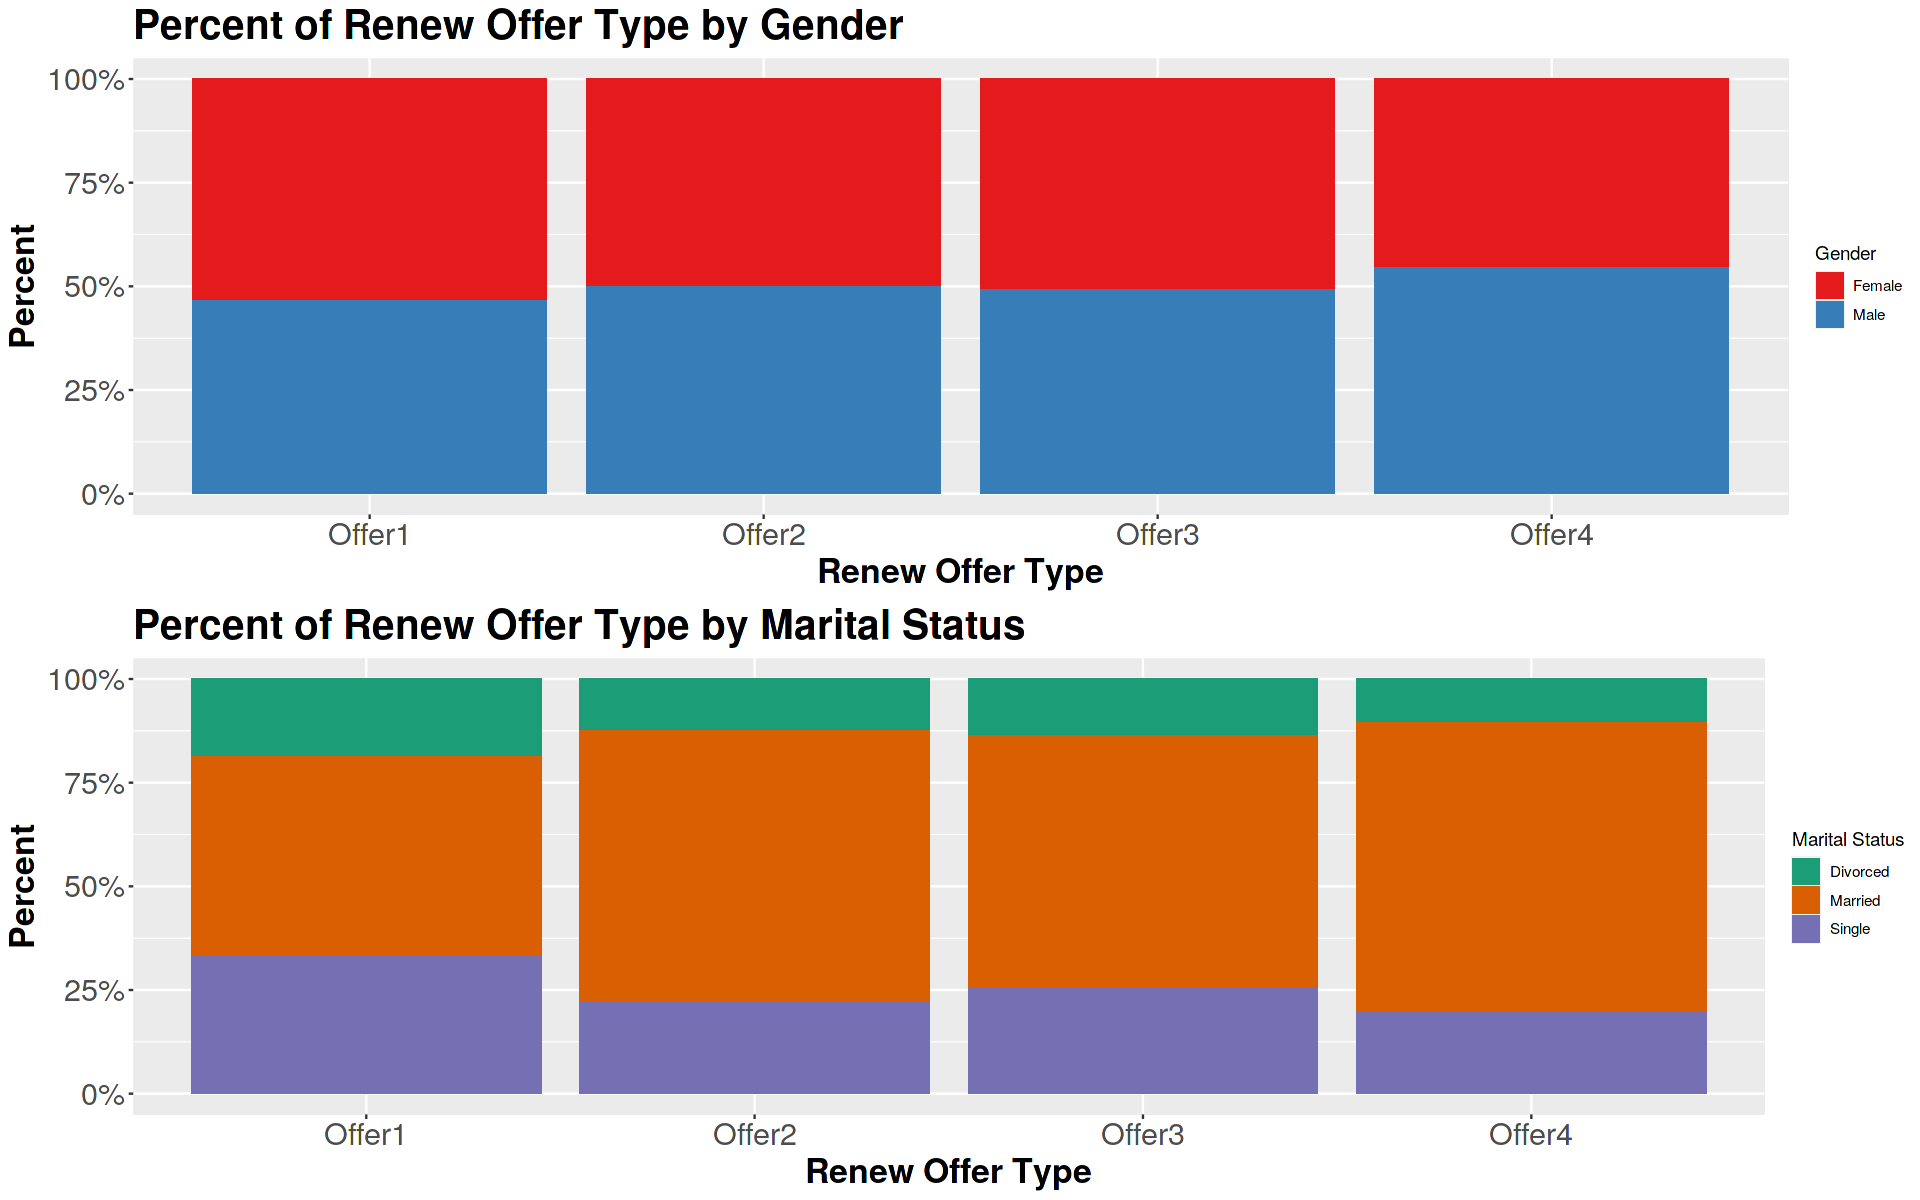

In [17]:
figsize(16,10)
# Plot percent of Renew Offer Type by Gender
ROGender <- ggplot(auto, aes(x= Renew.Offer.Type, fill=Gender)) + 
  geom_bar(stat = "count", position = "fill") + 
  scale_y_continuous(labels = scales::percent) +
  xlab("Renew Offer Type") + ylab("Percent") + 
  ggtitle("Percent of Renew Offer Type by Gender") +
  scale_fill_brewer (palette = "Set1", labels = c("Female", "Male")) + MyTheme

# Plot percent of Renew Offer Type by Marital Status
ROMarital <- ggplot(auto, aes(x=Renew.Offer.Type, fill = Marital.Status)) + 
  geom_bar(stat = "count", position = "fill") + 
  scale_y_continuous(labels = scales::percent) +
    xlab("Renew Offer Type") + ylab("Percent") + 
  ggtitle("Percent of Renew Offer Type by Marital Status") +
  scale_fill_brewer (palette = "Dark2", name = "Marital Status") + MyTheme


grid.arrange(ROGender, ROMarital)

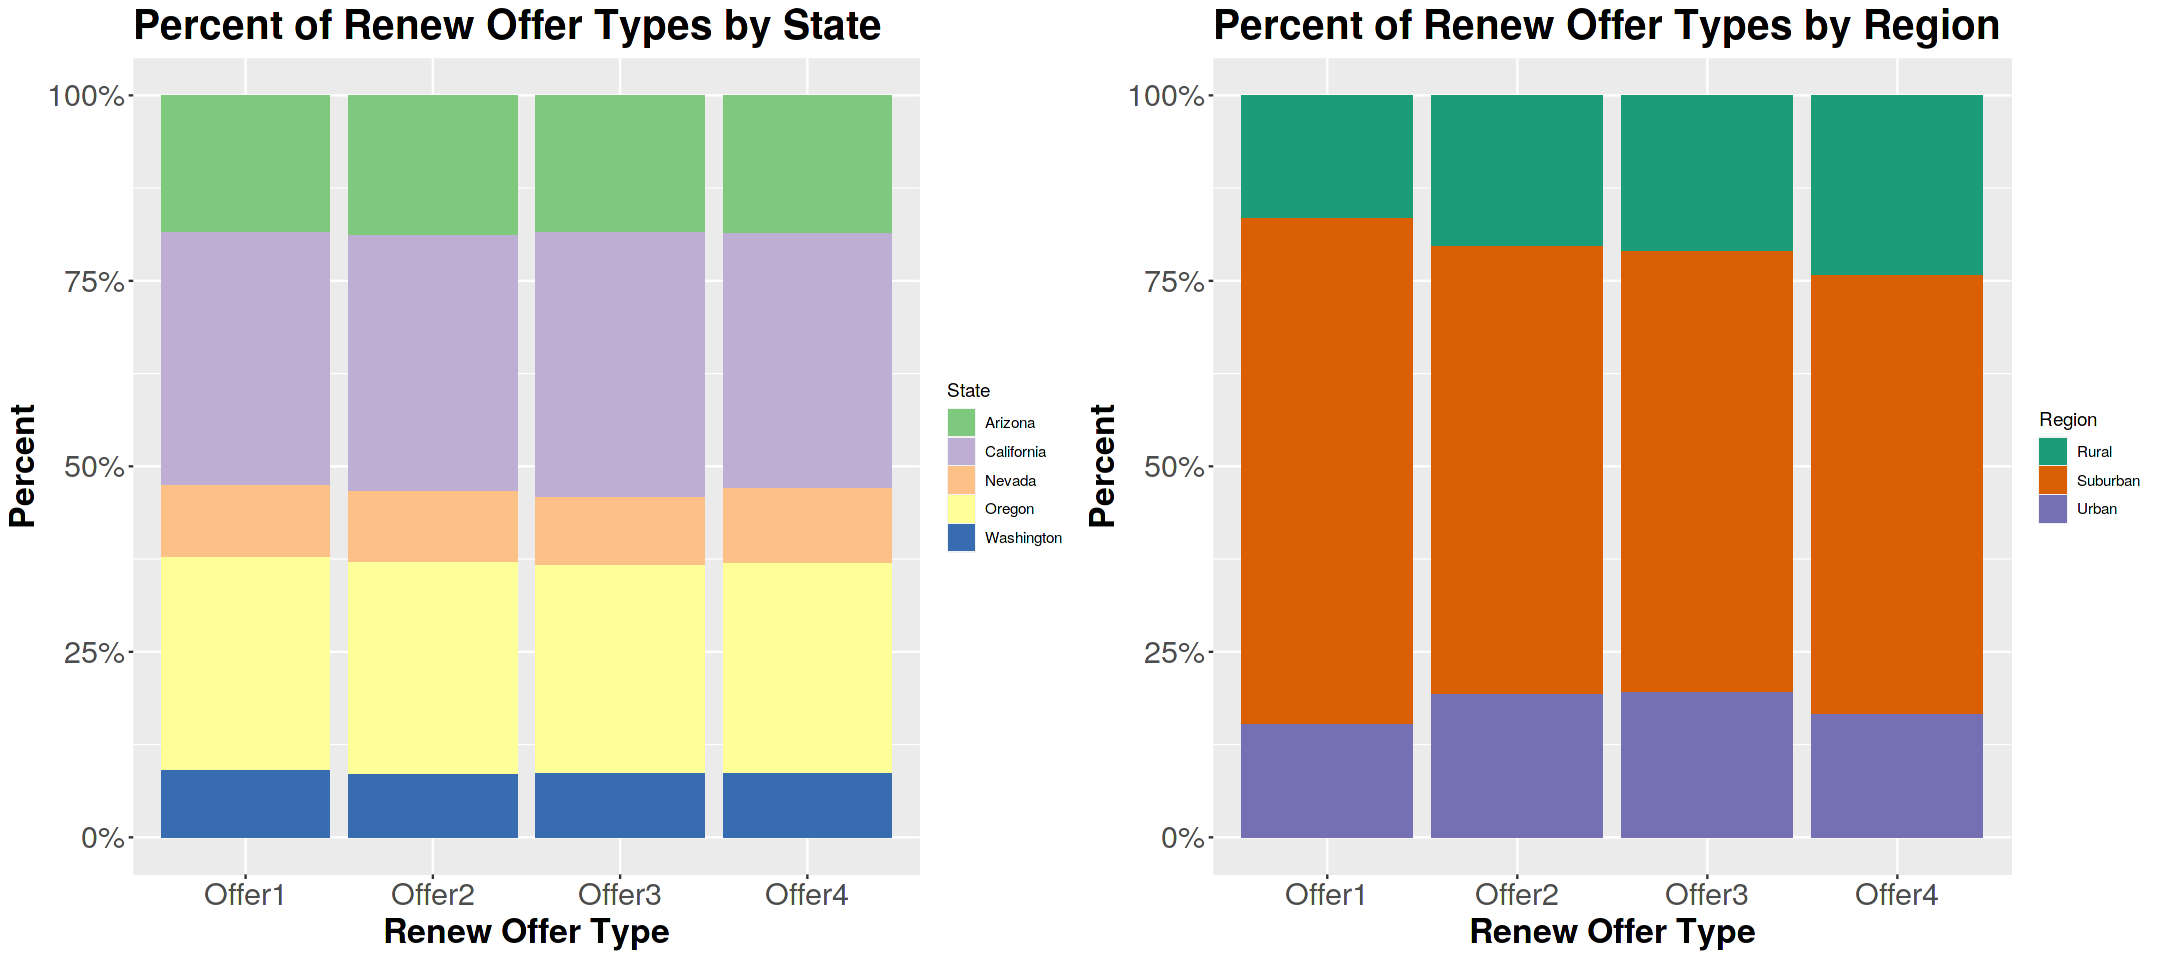

In [18]:
figsize(18,8)
# Plot percent of Renew Offer Type by State
ROState <- ggplot(auto, aes(x=Renew.Offer.Type, fill = State)) + 
  geom_bar(stat = "count", position = "fill") +  
  scale_y_continuous(labels = scales::percent) +
    xlab("Renew Offer Type") + ylab("Percent") + 
  ggtitle("Percent of Renew Offer Types by State") +
  scale_fill_brewer (palette = "Accent", name = "State") + MyTheme 

# Plot percent of Renew Offer Type by Location Code
ROLocation <- ggplot(auto, aes(x=Renew.Offer.Type, fill = Location.Code)) + 
  geom_bar(stat = "count", position = "fill") +  
  scale_y_continuous(labels = scales::percent) +
    xlab("Renew Offer Type") + ylab("Percent") + 
  ggtitle("Percent of Renew Offer Types by Region") +
  scale_fill_brewer (palette = "Dark2", name = "Region") + MyTheme

# Print plots in single grid
grid.arrange(ROState, ROLocation, nrow = 1) 

In [19]:
figsize (16,8)
# Plot percent of Renew Offer Type by Employment Status
ggplot(auto, aes(x=Renew.Offer.Type, fill = EmploymentStatus)) + 
  geom_bar(stat = "count", position = "fill") + 
  scale_y_continuous(labels = scales::percent) +
    xlab("Renew Offer Type") + ylab("Percent") + 
  ggtitle("Percent of Renew Offer Type by Employment Status") +
  scale_fill_brewer (palette = "YlOrBr", name = "Employment Status") + MyTheme

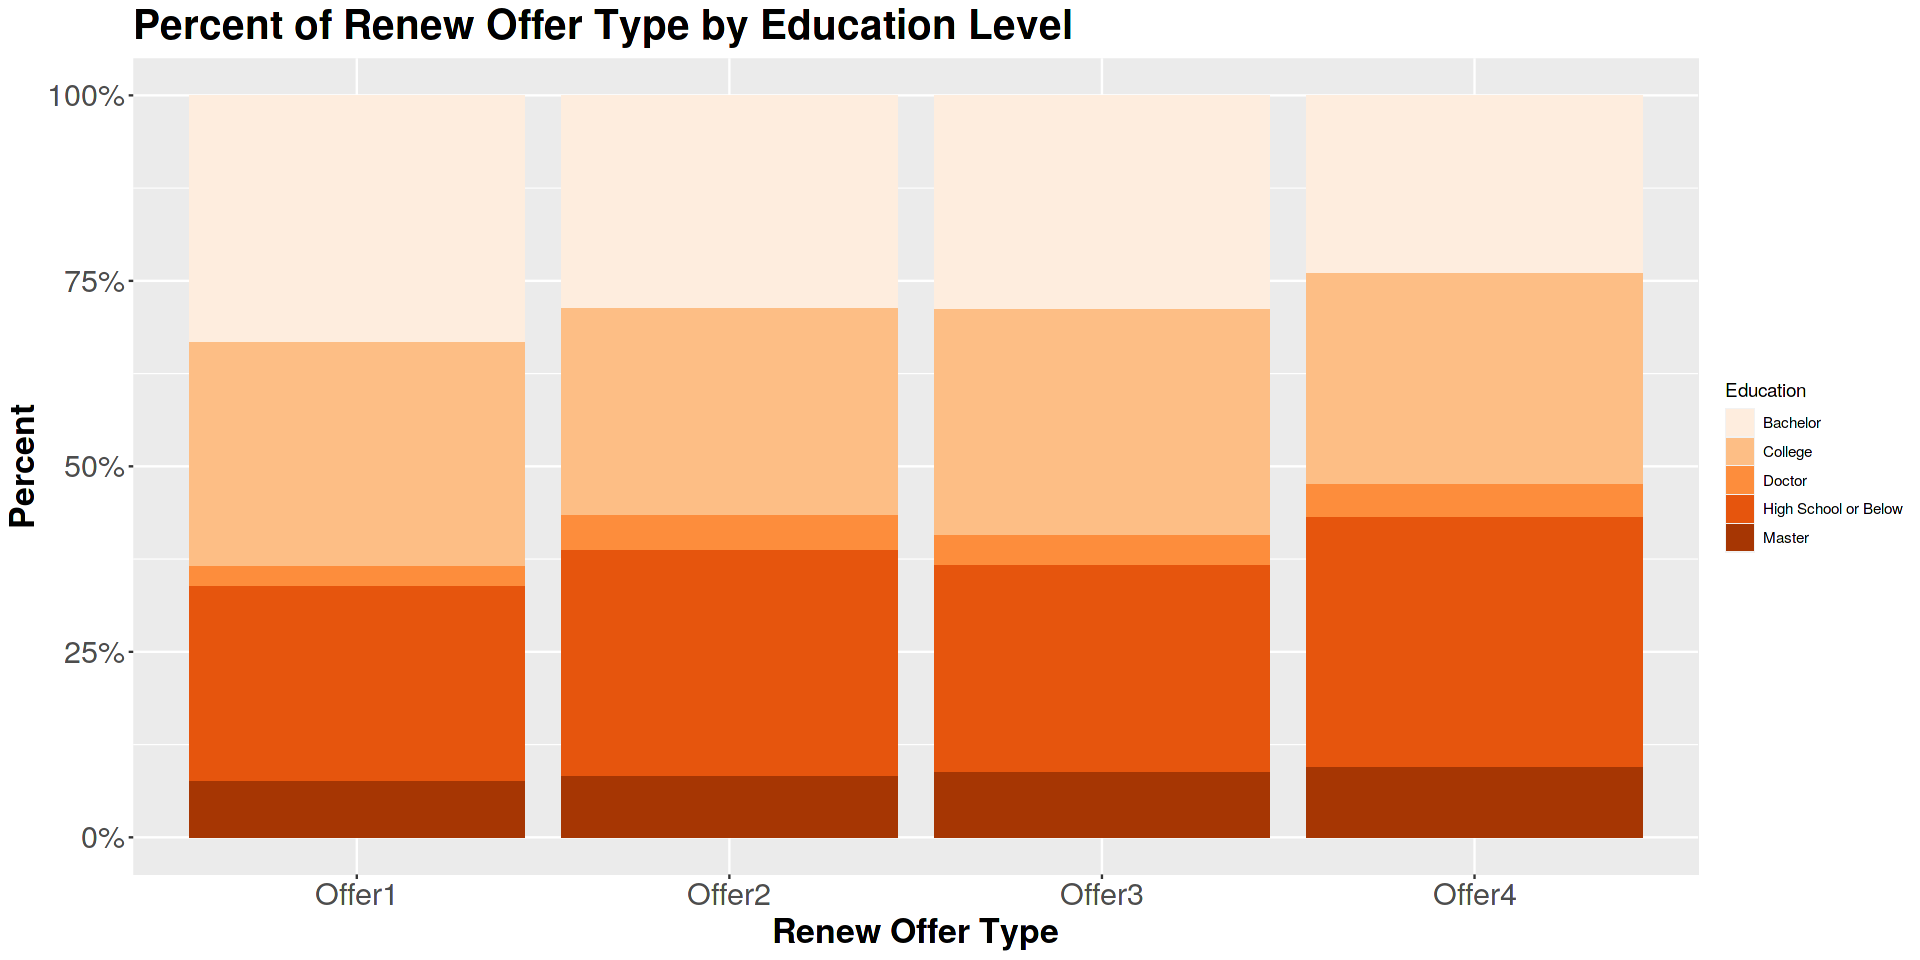

In [20]:
# Plot percent of Renew Offer Type by Education
ggplot(auto, aes(x=Renew.Offer.Type, fill = Education)) + 
  geom_bar(stat = "count", position = "fill") +
    scale_y_continuous(labels = scales::percent) +
    xlab("Renew Offer Type") + ylab("Percent") + 
  ggtitle("Percent of Renew Offer Type by Education Level") +
  scale_fill_brewer (palette = "Oranges", name = "Education") + MyTheme


In [21]:
# Plot percent of Renew Offer Type by Income
ggplot(auto, aes(x=Renew.Offer.Type, fill = IncomeBin)) + 
  geom_bar(stat = "count", position = "fill") +
   scale_y_continuous(labels = scales::percent) +
   xlab("Renew Offer Type") + ylab("Percent") + 
  ggtitle("Percent of Renew Offer Type by Income") +
  scale_fill_brewer (palette = "OrRd", name = "Income") + MyTheme


### Renewal Offer Type Takeaway

Each client from the three policy types received a single renew offer type of 1, 2, 3 or 4. The renew offer types were not distributed to equal number of customers.
* Approximately 41% of customers received Offer 1.
* Approximately 32% of customers received Offer 2.
* Approximately 16% of customers received Offer 3.
* Approximately 11% of customers received Offer 4. 

Interestingly the offer types were distributed at nearly equal proportions by policy type, gender, marital status, state and location code. There were minor differences in how the offers were distributed by education level with Offer 1 more heavily distributed among College and Bachelor degrees. Offer 1 was also received by a lower proportion of employed clients compared to the other offer types. This difference was evident in the income levels as nearly 70% of Offer 1 recipients had incomes below 45,000 dollars. 

## **Customer Response**

Customers' responses to the renew offer type they received was recorded.  A "Yes" response signified an acceptance of the renewal offer.  A "No" response signified that the renewal offer was denied. 

In [22]:
# Percent of Renew Offer Type by Response
ggplot(auto, aes(x=Renew.Offer.Type, fill = Response)) + geom_bar(stat = "count", position = "fill") +
  scale_y_continuous(labels = scales::percent) +
  xlab("Renew Offer Type") + ylab("Percent") + ggtitle("Percent of Renew Offer Type by Response") +
  scale_fill_manual(values = c("darkorange1", "darkorange4")) + MyTheme
# theme(axis.text = element_text(size = 12), 
#           axis.title = element_text(size = 14, face ="bold"), 
#           plot.title = element_text(size = 18, face = "bold"))

The purchase response rates for the renew offers were very low. 
* Offer 2 purchase response rate = 23.4% 
* Offer 1 purchase response rate = 15.8%. 
* Offer 3 purchase response rate = 2% 
* Offer 4 purchase response rate = 0%.

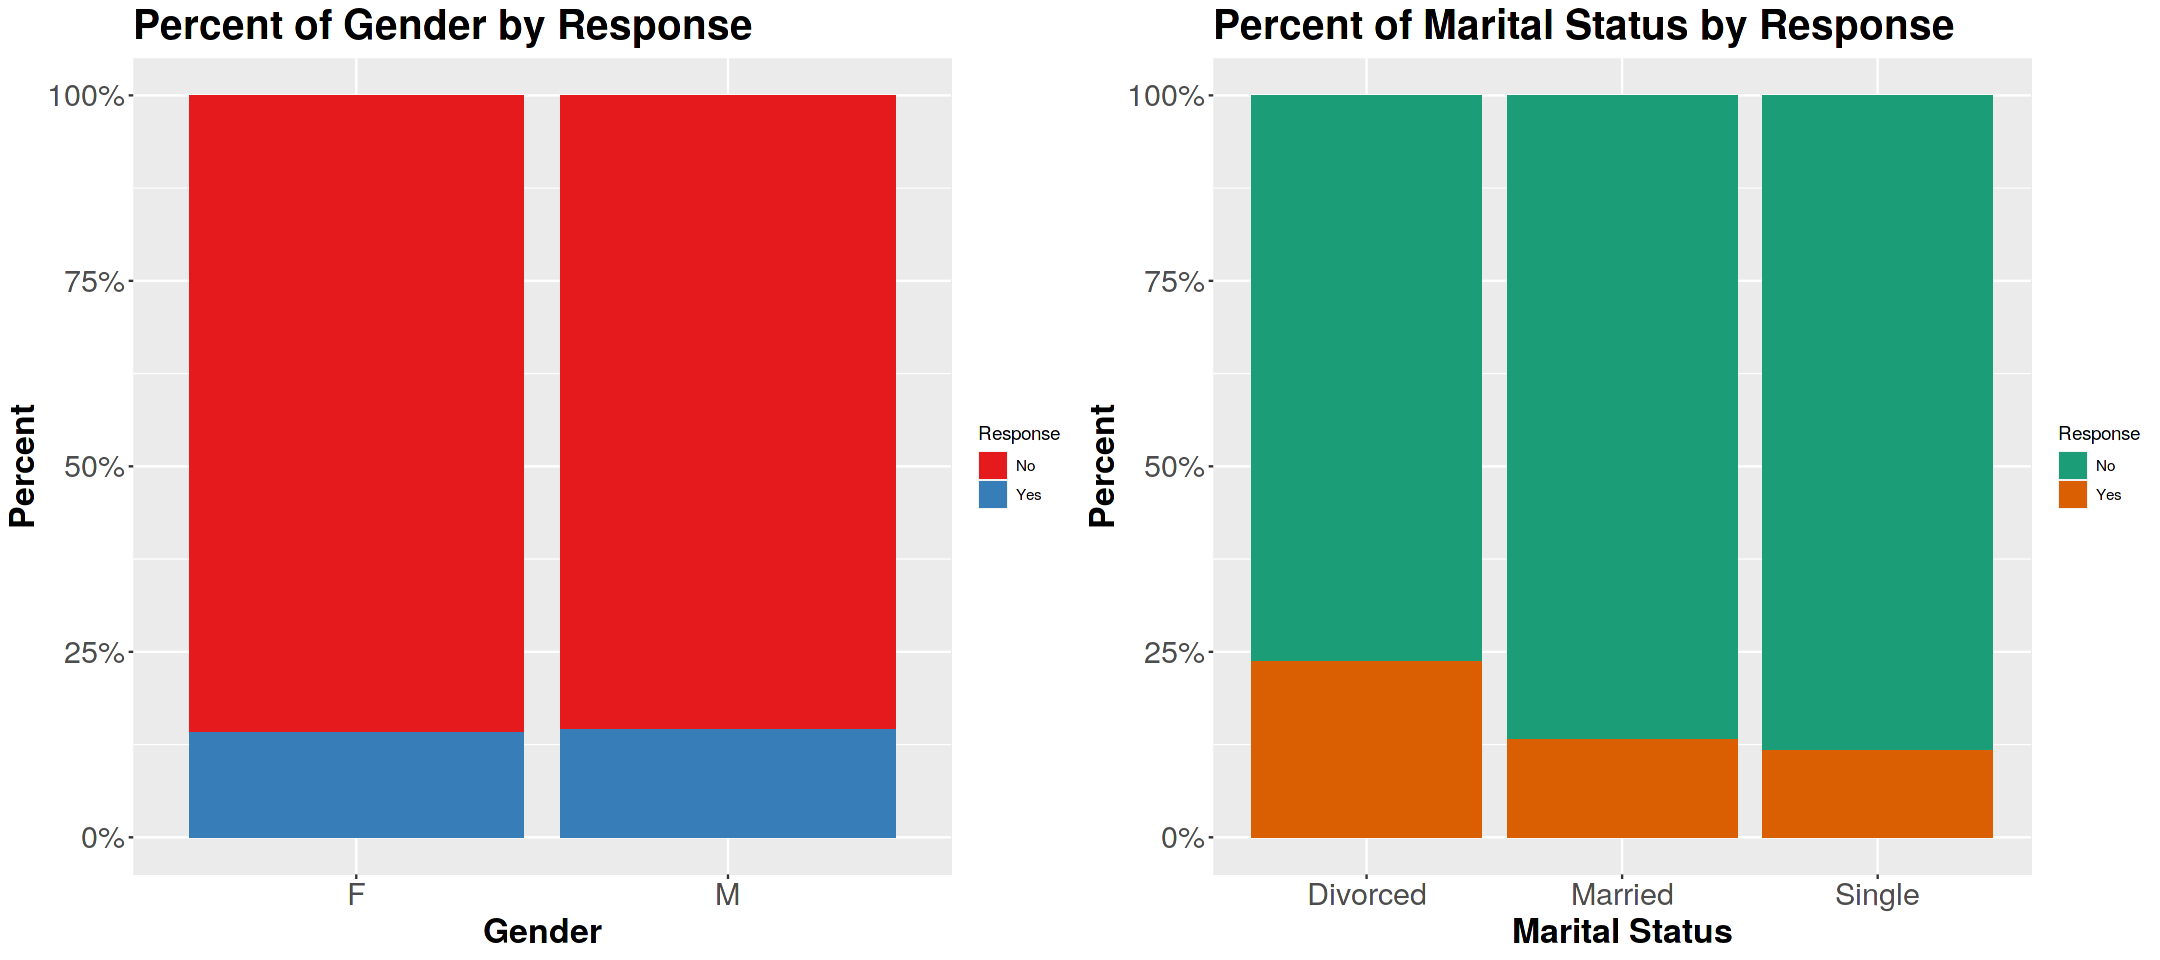

In [23]:
figsize(18,8)
# Plot Percent of Gender by Response
RPSGender <- ggplot(auto, aes(x= Gender, fill=Response)) + 
  geom_bar(stat = "count", position = "fill") + 
  scale_y_continuous(labels = scales::percent) +
  xlab("Gender") + ylab("Percent") + 
  ggtitle("Percent of Gender by Response") +
  scale_fill_brewer (palette = "Set1") + MyTheme

# Plot Percent of Marital Status by Response
RPSMarital <- ggplot(auto, aes(x=Marital.Status, fill = Response)) + 
  geom_bar(stat = "count", position = "fill") +
  scale_y_continuous(labels = scales::percent) +
    xlab("Marital Status") + ylab("Percent") + 
  ggtitle("Percent of Marital Status by Response") +
  scale_fill_brewer (palette = "Dark2") + MyTheme

# Plot graphs in a grid
grid.arrange(RPSGender, RPSMarital, nrow = 1)

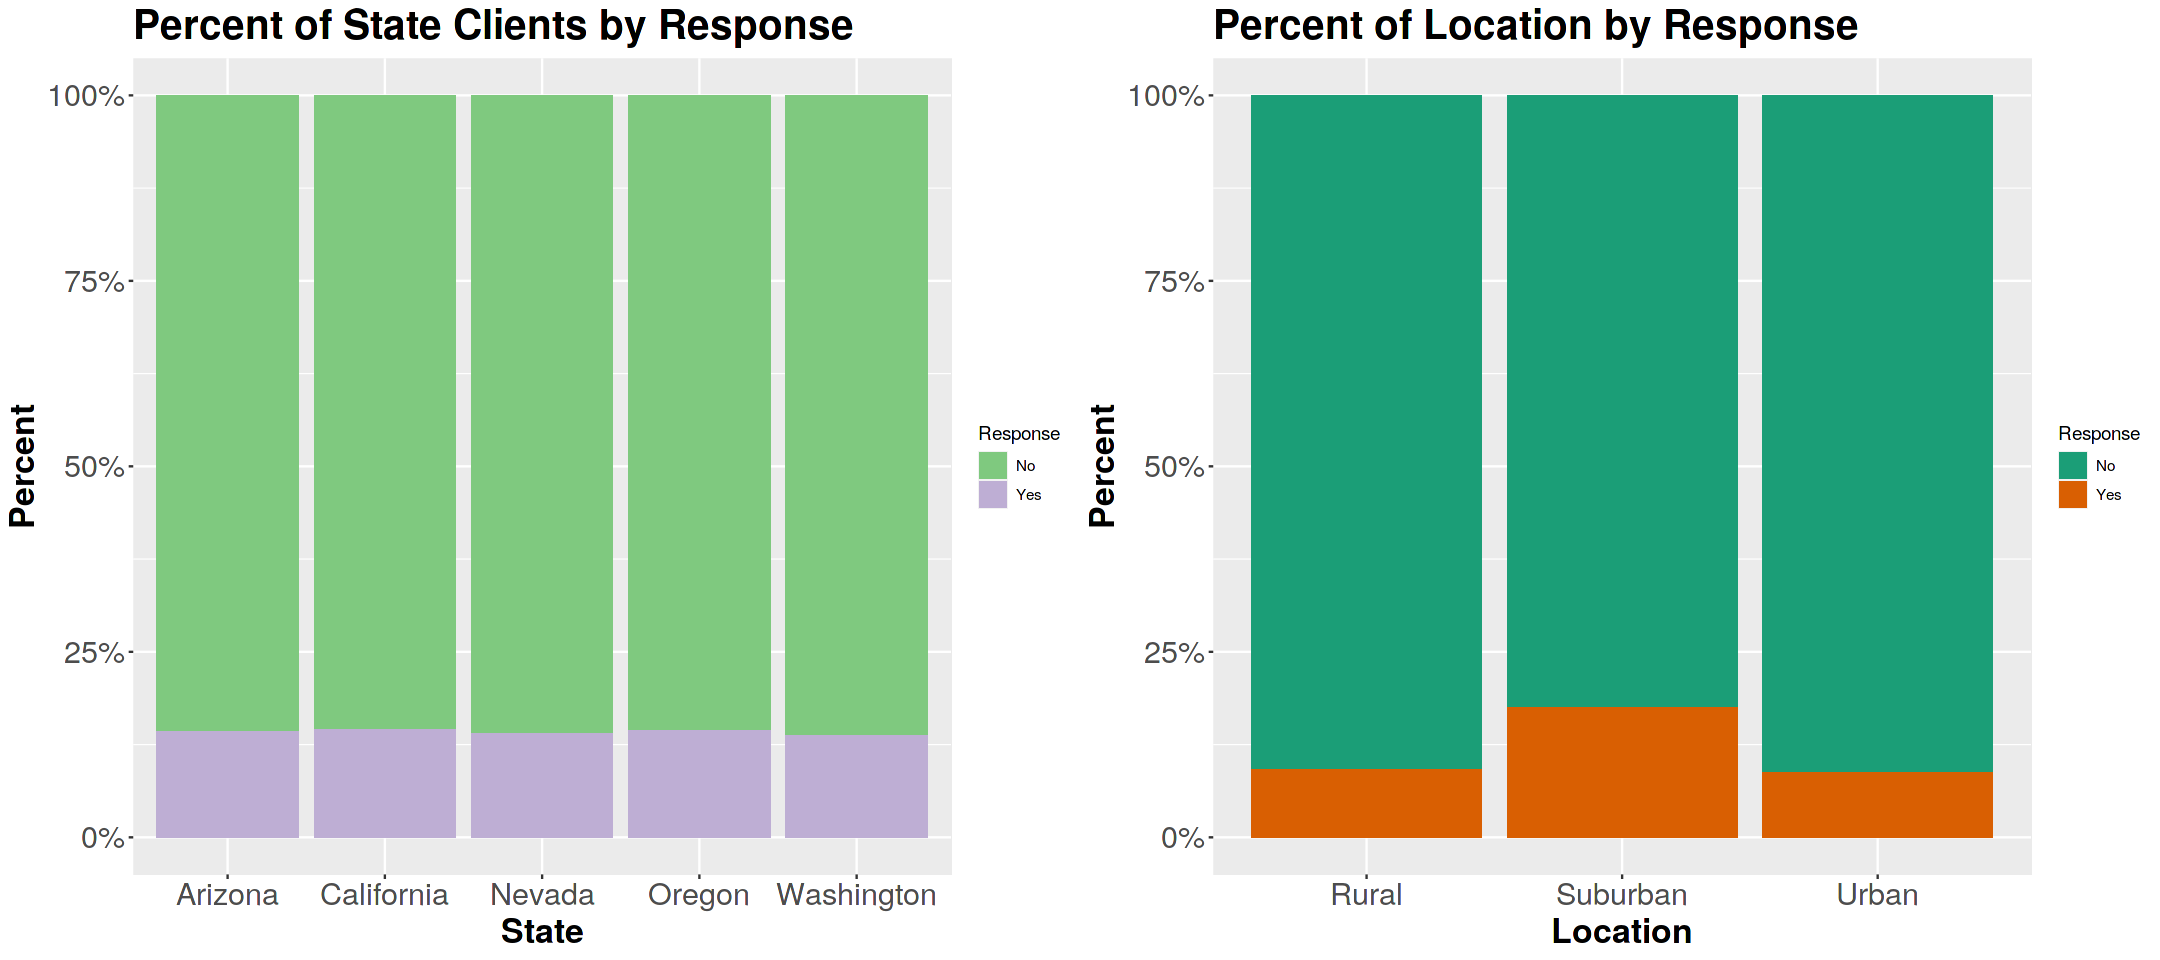

In [24]:
# Plot Percent of State Clients by Response
RPSState <- ggplot(auto, aes(x=State, fill = Response)) + 
  geom_bar(stat = "count", position = "fill") +
  scale_y_continuous(labels = scales::percent) +
    xlab("State") + ylab("Percent") + 
  ggtitle("Percent of State Clients by Response") +
  scale_fill_brewer (palette = "Accent") + MyTheme

# Plot Percent of Location Code Clients by Response
RPSLocation <- ggplot(auto, aes(x=Location.Code, fill = Response)) + 
  geom_bar(stat = "count", position = "fill") +
  scale_y_continuous(labels = scales::percent) +
    xlab("Location") + ylab("Percent") + 
  ggtitle("Percent of Location by Response") +
  scale_fill_brewer (palette = "Dark2") + MyTheme 

# Plot charts in grid
grid.arrange(RPSState, RPSLocation, nrow = 1)

In [25]:
figsize(16,8)
# Plot Response Rate by Employment Status
ggplot(auto, aes(x=EmploymentStatus, fill = Response)) + 
  geom_bar(stat = "count", position = "fill") +
  scale_y_continuous(labels = scales::percent) +
    xlab("Employment Status") + ylab("") + 
  ggtitle("Response Rate by Employment Status") +
  scale_fill_manual (values = c("darkorange1", "darkorange4")) + MyTheme


In [26]:
# Plot Response Rate by Education Level
ggplot(auto, aes(x=Education, fill = Response)) + 
  geom_bar(stat = "count", position = "fill") +
  scale_y_continuous(labels = scales::percent) +
    xlab("Education Level") + ylab("") + 
  ggtitle("Response Rate by Education Level") +
  scale_fill_brewer (palette = "YlOrBr", name = "Education") + MyTheme

In [27]:
# Plot Response Rate by Income
ggplot(auto, aes(x=IncomeBin, fill = Response)) + 
  geom_bar(stat = "count", position = "fill") +
  scale_y_continuous(labels = scales::percent) +
    xlab("Annual Income") + ylab("") + 
  ggtitle("Response Rate by Income") +
  scale_fill_brewer (palette = "Accent") + MyTheme

### Response Takeaway

* Men and women were equally as likely to respond with a "Yes".  
* Divorced clients were slightly more likely to say "Yes" to an offer. 
* The purchase response rates were fairly the same by state.  
* Clients from Suburban areas had a higher purchase response rate than Rural or Urban clients.
* Clients with post graduate degrees were slightly more likely to accept the renewal offers they received.
* Nearly 75% or retired clients responded "Yes" to their renewal offers.  
* Clients earning between 15,000-29,999 and 60,000-74,999 answered "Yes" to renewal offers slightly more often than clients of other income ranges.

## **Apriori Associations Rule Mining (ARM)**

Apriori ARM uses frequent pattern analysis on transactional datasets to find itemsets (items that often occur together). ARM defines these itemsets as rules. Each rule has four measurements:
* Support - percent of transactions that contain an itemset 
* Confidence - frequency that items occur together in an itemset expressed in percent
* Length - number of items in an itemset
* Lift - likelihood of an occurrence (Y) given another occurrence (X) occurred while controlling for the popularity of Y.  Lift is calculated as ratio of support (X,Y)/((support(X)* support(Y)). A lift of 1 = no association. Lifts greater than 1 are likely to occur together. Lifts less than 1 are unlikely to occur together.

The Apriori Association Rules Mining (ARM) algorithm will be employed for further EDA into customer responses to the renewal offers. Specifically, ARM will be performed to find customer characteristics associated with a yes response to each renew offer type.

To perform Apriori ARM, a few steps are required to transform the data into a transactional or sparse data set with only nominal data types. See code for transformation process if interested. 

In [28]:
# STEP 1: CONVERT CONTINUOUS DATA INTO DISCRETIZED FACTORS.

# Adding predetermined Customer Lifetime Value categories.
auto$CLV_Levels <- as.factor(ifelse(auto$Customer.Lifetime.Value < 5000, "Low_CLV",
                   ifelse(between(auto$Customer.Lifetime.Value, 5000, 8000), "Avg_CLV",
                   ifelse(between(auto$Customer.Lifetime.Value, 8001, 15000), "High_CLV",
                          "Super_CLV"))))
# Adding discretized variables for Months Since Policty Inception
auto$MoInception <- as.factor(ifelse(auto$Months.Since.Policy.Inception < 24, "<_24_months",
                      ifelse(between(auto$Months.Since.Policy.Inception, 24,48), "24-47_months",
                      ifelse(between(auto$Months.Since.Policy.Inception,49,72), "48-71_months",
                             "72+_months"))))

# Adding discretized variables for Months Since Last Claim 
auto$MoLastClaim <- as.factor(ifelse(auto$Months.Since.Last.Claim < 6, "<_6_months",
                      ifelse(between(auto$Months.Since.Last.Claim, 6,11), "6-11_months",
                      ifelse(between(auto$Months.Since.Last.Claim, 12,17), "12-17_months",
                      ifelse(between(auto$Months.Since.Last.Claim, 18,23), "18-23_months",
                      ifelse(between(auto$Months.Since.Last.Claim, 24,29), "24-29_months",
                             "30+_months"))))))

# Note: Income, Monthly Premiums and Total Claim Amounts were discretized during EDA process.

# STEP 2: MOVE ALL NOMINAL OR FACTOR COLUMNS INTO NEW DATA FRAME NAMED "autodiscrete"
autodiscrete <- auto[,c(2,4,5,6,8,9,11,12,18,19,20,21,23,24,26,27,28,29,30,31)]

# STEP 3: SEGREGATE EACH OFFER TYPE INTO ITS OWN DATA FRAME
# Separate the Offers 1, 2, and 3 into their own datasets. 
# Note: Offer 4 is excluded since no clients accepted Offer 4.
Offer1 <- autodiscrete[autodiscrete$Renew.Offer.Type == "Offer1",]
Offer2 <- autodiscrete[autodiscrete$Renew.Offer.Type == "Offer2",]
Offer3 <- autodiscrete[autodiscrete$Renew.Offer.Type == "Offer3",]

# Remove Renew.Offer.Type variable from the datasets.
Offer1 <- Offer1[,-11]
Offer2 <- Offer2[,-11]
Offer3 <- Offer3[,-11]

# STEP 4: CONVERT THE OFFER TYPE DATA FRAMES INTO TRANSACTIONAL DATA SETS
autotrans1 <- as(Offer1,"transactions")
autotrans2 <- as(Offer2, "transactions")
autotrans3 <- as(Offer3, "transactions")

# check format of autotrans(x) data
autotrans1
autotrans2
autotrans3

transactions in sparse format with
 3752 transactions (rows) and
 83 items (columns)

transactions in sparse format with
 2926 transactions (rows) and
 83 items (columns)

transactions in sparse format with
 1432 transactions (rows) and
 83 items (columns)

The following parameters will be set to all 3 Offers. Right hand side (rhs) association will be set to only include "Response=Yes" to filter out "no" responses.  Length will be limited to a maximum of 5 items to an itemset.

    lhs                            rhs               support confidence   coverage     lift count
[1] {EmploymentStatus=Retired,                                                                   
     Sales.Channel=Agent,                                                                        
     Vehicle.Size=Medsize}      => {Response=Yes} 0.01918977  0.9230769 0.02078891 5.830614    72
[2] {Coverage=Basic,                                                                             
     EmploymentStatus=Retired,                                                                   
     Vehicle.Size=Medsize}      => {Response=Yes} 0.02078891  0.8965517 0.02318763 5.663067    78
[3] {EmploymentStatus=Retired,                                                                   
     Policy.Type=Personal Auto,                                                                  
     Sales.Channel=Agent}       => {Response=Yes} 0.01945629  0.8902439 0.02185501 5.623224    73
[4] {Coverage=Basic,

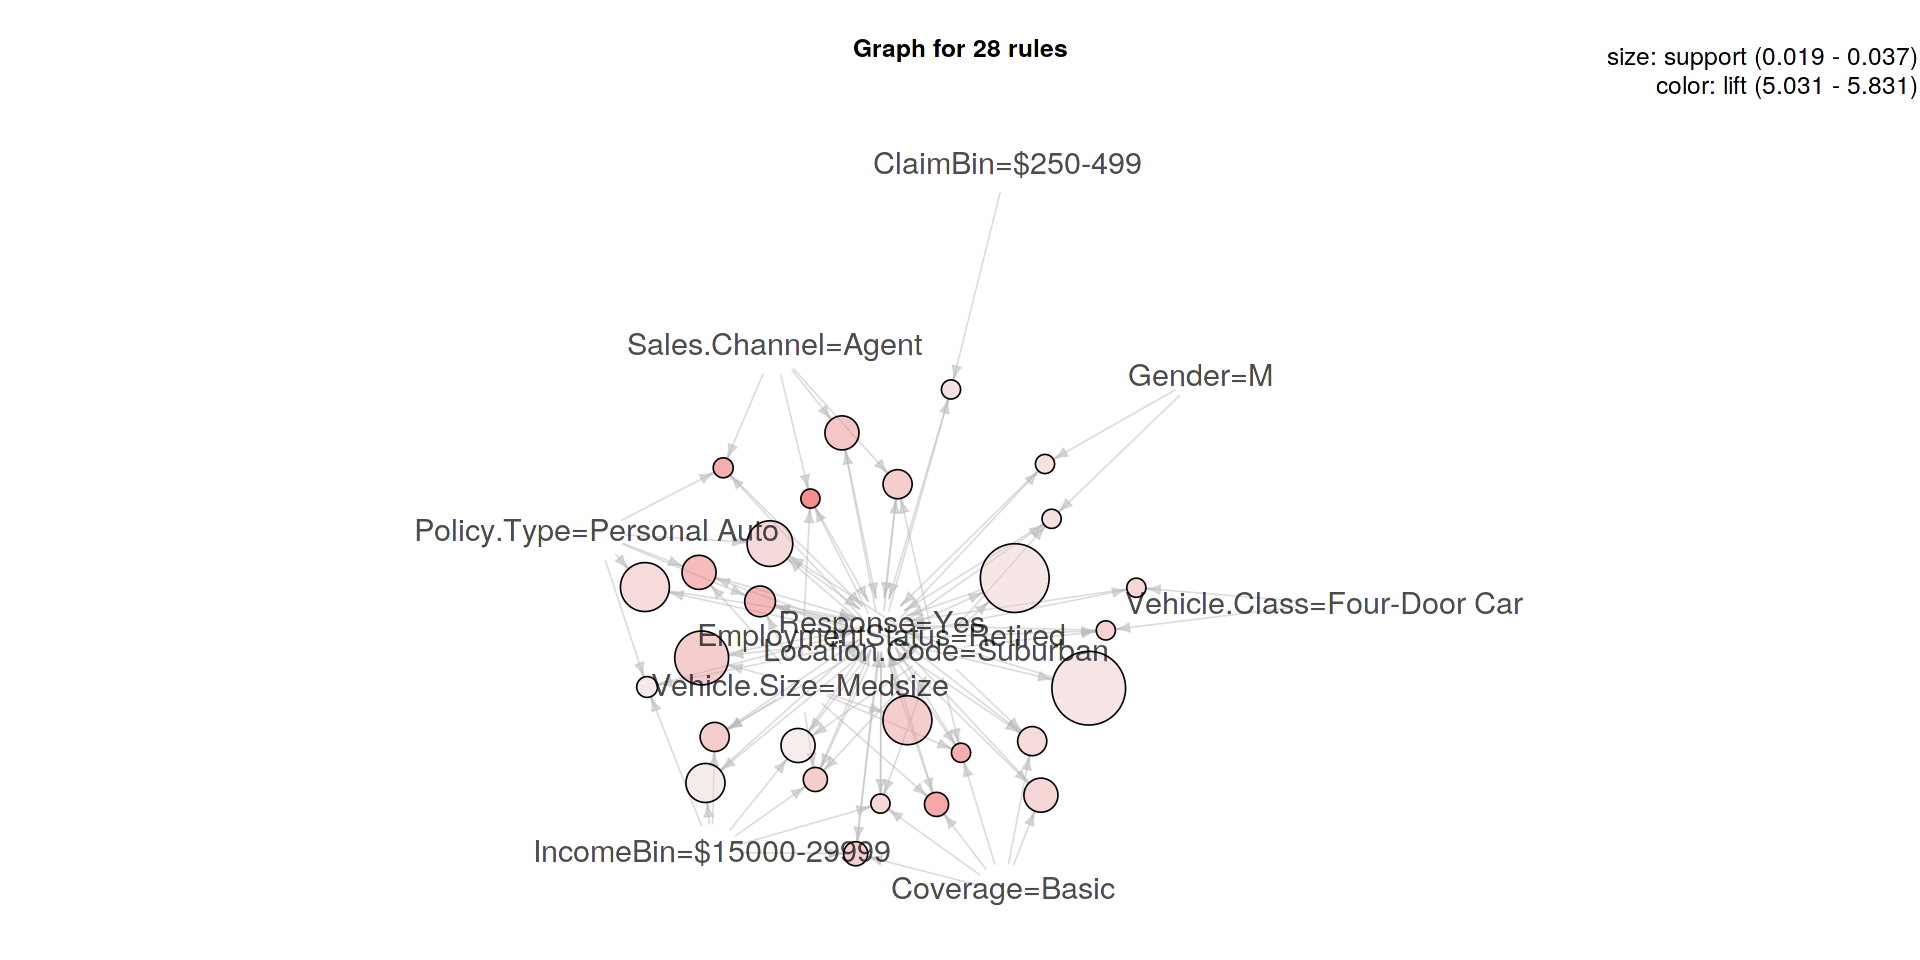

In [29]:
# Apply Apriori ARM algorithm to clients who received Offer 1
YesRule1<-apriori(data=autotrans1, parameter=list(supp=0.019,conf = 0.70, maxlen=5), 
               appearance = list(default="lhs",rhs="Response=Yes"),
               control = list(verbose=FALSE))

# Sort results by confidence in descending order
YesRule1<-sort(YesRule1, decreasing=TRUE,by="confidence")

# Inspect the top 5 rules by confidence
inspect(YesRule1[1:5])

# Plot the results in a graph (unfortunately interactive or htmlwidget options are not viewable on Kaggle share)
plot(YesRule1,method="graph",engine = "default", cex = 1.5)

ARM results for Offer 1

Offer 1 parameters were set to a support = 0.019 for a threshold of associations occurring at least 1.9% of the time, a confidence = 0.70 for a threshold of associations appearing together at least 70%.  This resulted in 28 rules with all lifts >3. The key customer characteristics associated with a “yes” response to Offer 1 were:
* Suburban 
* Retirees
* Incomes 15k-30k
* Midsized cars
* Basic coverage

    lhs                            rhs               support confidence   coverage     lift count
[1] {Coverage=Extended,                                                                          
     Gender=F,                                                                                   
     Location.Code=Suburban,                                                                     
     Marital.Status=Married,                                                                     
     Sales.Channel=Agent}       => {Response=Yes} 0.02050581  0.6896552 0.02973342 2.950192    60
[2] {Coverage=Extended,                                                                          
     Gender=F,                                                                                   
     Location.Code=Suburban,                                                                     
     Sales.Channel=Agent}       => {Response=Yes} 0.02870813  0.6131387 0.04682160 2.622871    84
[3] {Coverage=Extend

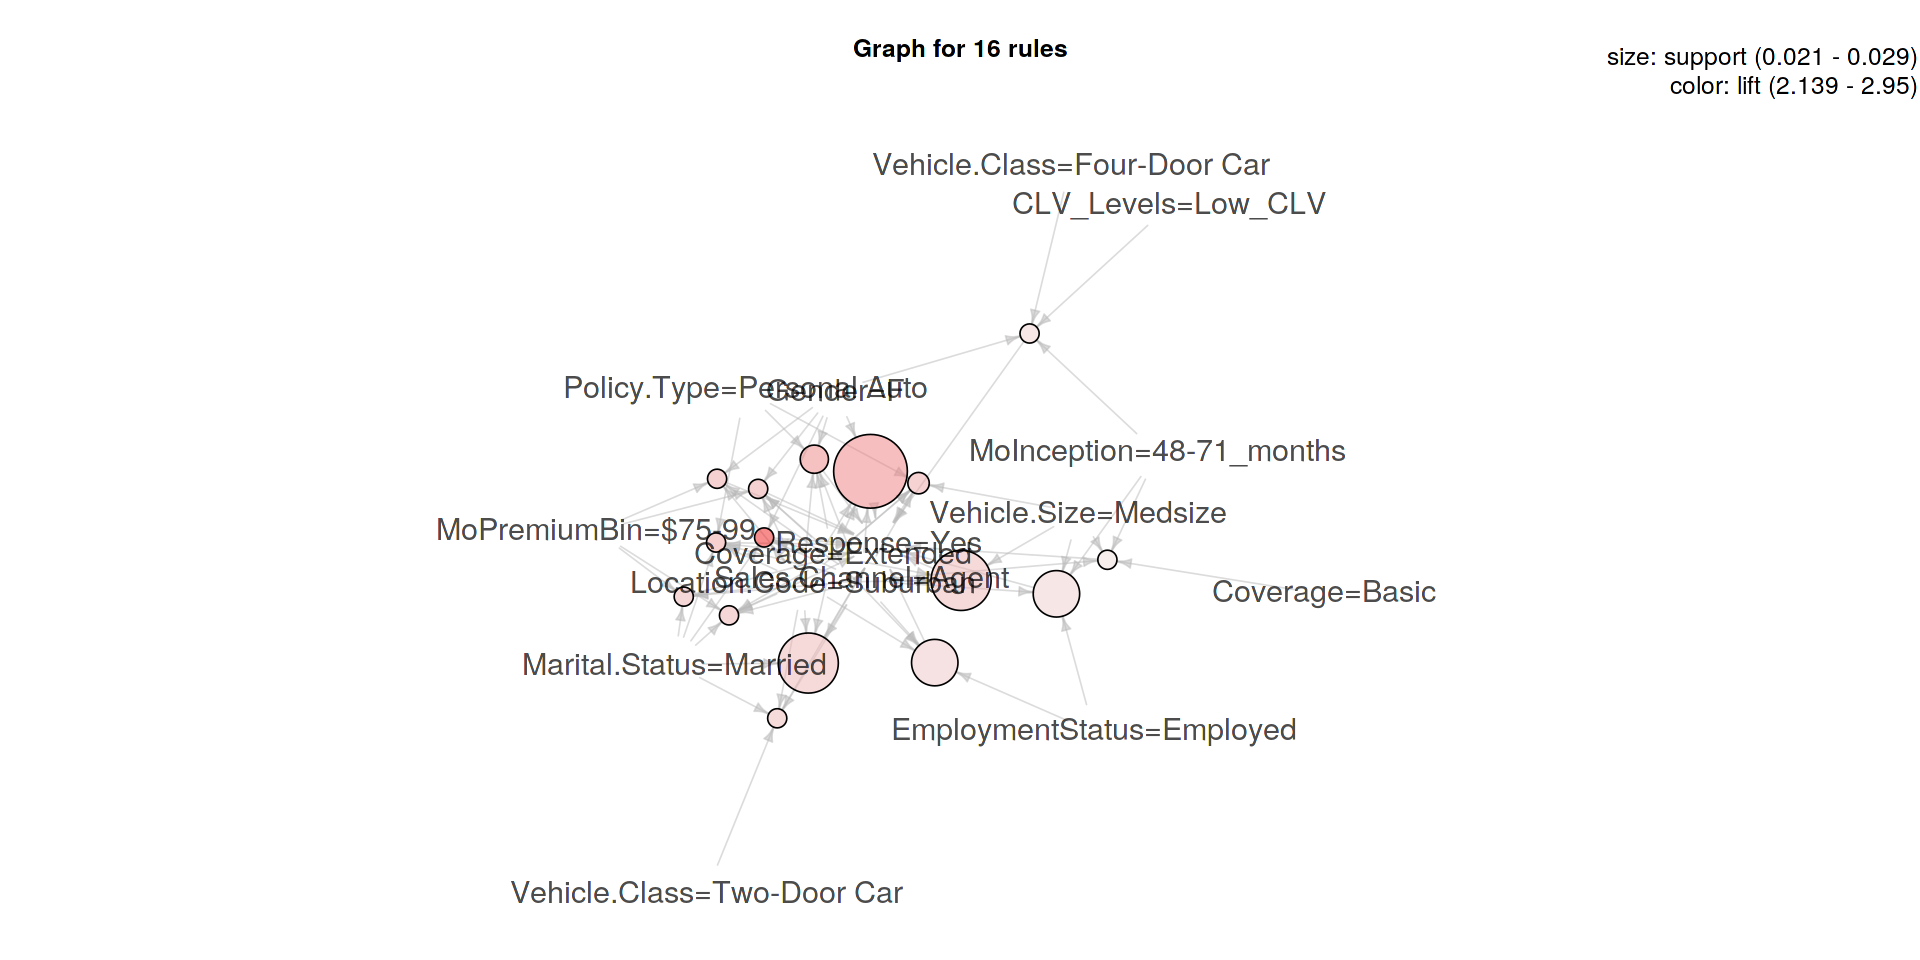

In [30]:
# Apply Apriori ARM algorithm to customers who received Offer 2
YesRule2<-apriori(data=autotrans2, parameter=list(supp=0.02,conf = 0.50, minlen = 5), 
               appearance = list(default="lhs",rhs="Response=Yes"),
               control = list(verbose=FALSE))

# Sort results by confidence in descending order
YesRule2<-sort(YesRule2, decreasing=TRUE,by="confidence")

# Print Top 5 rules by confidence
inspect(YesRule2[1:5])

# Plot the results in a graph (unfortunately interactive or htmlwidget options are not viewable on Kaggle share)
plot(YesRule2,method="graph",engine = "default", cex = 1.5 )

ARM results for Offer 2

Offer 2 parameters were set to support =0.02, confidence = 0.5 and max length = 5 resulting 16 rules with all lifts > 2. 
The key customer characteristics associated with a “yes” response to Offer 2 were:
* Suburban
* Married
* Women
* Extended coverage
* Acquired Policy through Sales Agent

    lhs                              rhs               support confidence   coverage     lift count
[1] {Gender=M,                                                                                     
     ClaimBin=$250-499,                                                                            
     CLV_Levels=Low_CLV}          => {Response=Yes} 0.01256983  0.1363636 0.09217877 6.509091    18
[2] {Marital.Status=Married,                                                                       
     ClaimBin=$250-499,                                                                            
     CLV_Levels=Low_CLV}          => {Response=Yes} 0.01256983  0.1125000 0.11173184 5.370000    18
[3] {Gender=M,                                                                                     
     Marital.Status=Married,                                                                       
     CLV_Levels=Low_CLV}          => {Response=Yes} 0.01256983  0.1139241 0.11033520 5.437975    18


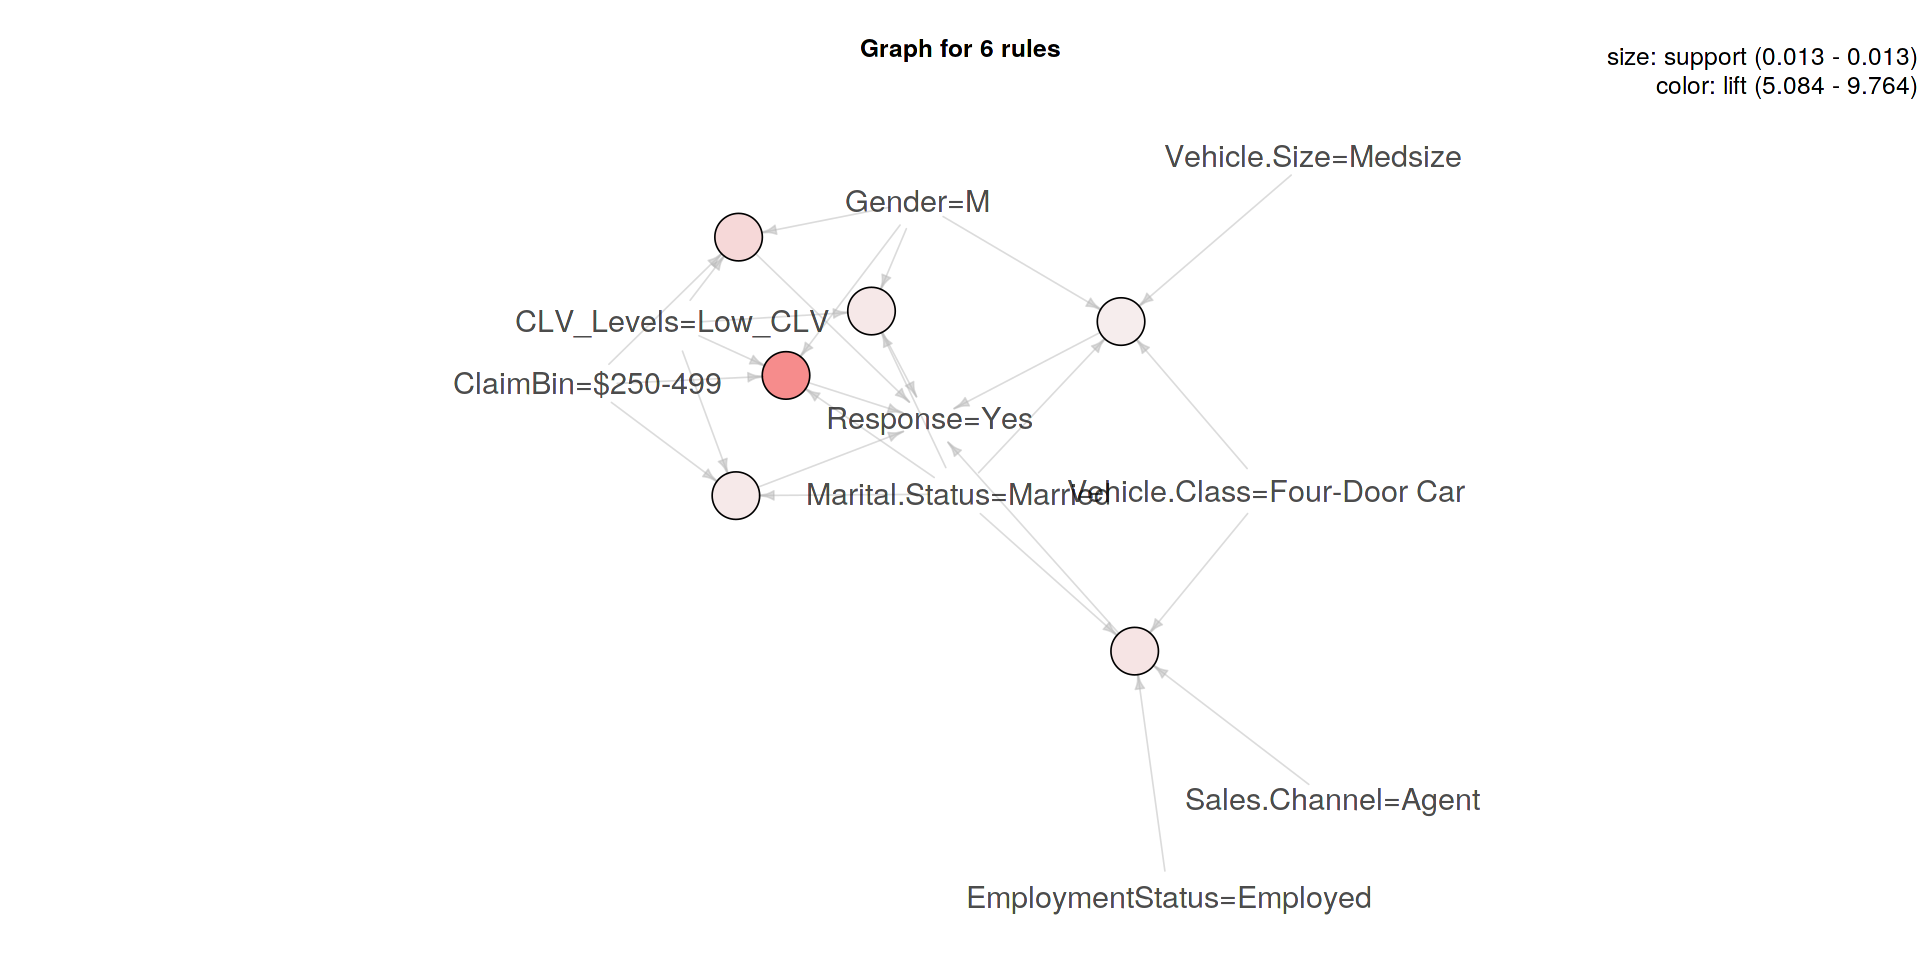

In [31]:
# Apply Apriori ARM algorithm to customers who received Offer 3
YesRule3<-apriori(data=autotrans3, parameter=list(supp=0.01,conf = 0.10, maxlen=5), 
               appearance = list(default="lhs",rhs="Response=Yes"),
               control = list(verbose=FALSE))

# Sort results by confidence in descending order
YesRule3<-sort(YesRule3, decreasing=TRUE,by="support")

# Print Top 5 rules by confidence
inspect(YesRule3[1:5])

# Plot the results in a graph (unfortunately interactive or htmlwidget options are not viewable on Kaggle share)
plot(YesRule3,method="graph",engine = "default", cex = 1.5 )

ARM results for Offer 3

Offer 3 parameters were set to a support =0.01, confidence = 0.10 and max length = 5 resulting 6 rules with all lifts > 5. The key customer characteristics associated with a “yes” response to Offer 3 were:
* Married
* Men
* Customer Lifetime Value < 5000 dollars (Low CLV)
* Total Claim Amounts between 250 and 499 dollars

**Note:** Offer 3 results fall into the realm of high chance associations due to the low support (< 0.01) and low confidence (<0.21) values for all rules.

### Apriori ARM Takeaway
The ARM results provided clear distinctions between customers who had a “yes” response to each of the Offers.  This strongly suggested that each offer appealed to different groups of customers, and implied that classification algorithms may be employed to predict which Offers would be most likely accepted by a customer based on the variables available in the data.

## **Random Forest: Predicting Responses**

85.7% of customers denied the renew offers they received. If the offers were to be redistributed to these customers, can a Random Forest classification model predict which renew offer would be most likely accepted by a customer based on their profile?

Random Forest is a supervised classification algorithm that uses multiple decision trees to determine its results. In essence each decision tree makes a prediction and the highest number of trees with the same prediction defines the result.

Random Forest can use a mix of nominal and continuous data types. Nineteen predictor variables and "Response" as the response variable will be used to train the model.  Each Offer Type will receive its own model (Note: Offer 4 is excluded since no clients accepted Offer 4). A 10 fold cross validation will be executed on each model to measure the accuracy and precision.  Best model will be applied to customers who originally denied their offer. Results of model predictions will determine best redistribution of renew offers. 


In [32]:
# Prepare a data frame to be used for random forest model
autorf <- auto[,c(2:6,8:15,17:24)]

# Segregate the data sets by Renew.Offer.Type to predict each offer
Offer_1 <- autorf[autorf$Renew.Offer.Type=="Offer1",]
Offer_2 <- autorf[autorf$Renew.Offer.Type == "Offer2",]
Offer_3 <- autorf[autorf$Renew.Offer.Type == "Offer3",]

# Remove the Renew.Offer.Type variable from the data sets.
Offer_1 <- Offer_1[,-17]
Offer_2 <- Offer_2[,-17]
Offer_3 <- Offer_3[,-17]

# Spot check variables in Offer1 to illustrate variables to be used in model
head(Offer_1,5)

State      Customer.Lifetime.Value Response Coverage Education
1 Washington  2763.519               No       Basic    Bachelor 
3 Nevada     12887.432               No       Premium  Bachelor 
4 California  7645.862               No       Basic    Bachelor 
5 Washington  2813.693               No       Basic    Bachelor 
7 Oregon      5380.899               Yes      Basic    College  
  EmploymentStatus Gender Income Location.Code Marital.Status
1 Employed         F      56274  Suburban      Married       
3 Employed         F      48767  Suburban      Married       
4 Unemployed       M          0  Suburban      Married       
5 Employed         M      43836  Rural         Single        
7 Employed         F      55350  Suburban      Married       
  Monthly.Premium.Auto Months.Since.Last.Claim Months.Since.Policy.Inception
1  69                  32                       5                           
3 108                  18                      38                           
4 106                  18                      65                           
5  73                  12                      44                           
7  67                   0                      13                           
  Number.of.Policies Policy.Type    Policy       Sales.Channel
1 1                  Corporate Auto Corporate L3 Agent        
3 2                  Personal Auto  Personal L3  Agent        
4 7                  Corporate Auto Corporate L2 Call Center  
5 1                  Personal Auto  Personal L1  Agent        
7 9                  Corporate Auto Corporate L3 Agent        
  Total.Claim.Amount Vehicle.Class Vehicle.Size
1 384.8111           Two-Door Car  Medsize     
3 566.4722           Two-Door Car  Medsize     
4 529.8813           SUV           Medsize     
5 138.1309           Four-Door Car Medsize     
7 321.6000           Four-Door Car Medsize

The default setting of 500 trees for the ntree parameter in the caret package was used. The best models for Offer 1 and Offer 2 used mtry = 16 or 16 variables tried at each node split.  The best model for Offer 3 used mtry = 6. 

The Random Forest models' cross validation accuracies were all above 99%.  In addition the precision on the "yes" response were all above 95%.  A high accuracy on the "yes" precision is important because the redistribution assignments will be determined by the probability of a "yes" response.

* Offer 1 model accuracy = 99.5% with yes precision = 96.7%
* Offer 2 model accuracy = 99.6% with yes precision = 98.6%
* Offer 3 model accuracy = 100.0% with yes precision = 100.0%

Output results shown below.

In [33]:
# Use caret package to perform cross validation on train data sets.

# Create train and test data sets using 80/20 split
# Train and test data sets for clients who received Offer 1
set.seed(49)
sample_1 <- createDataPartition(Offer_1$Response, p=0.80, list = FALSE)
train_1 <- Offer_1[sample_1,]
test_1 <- Offer_1[-sample_1,]

# Train and test data sets for clients who received Offer 2
set.seed(49)
sample_2 <- createDataPartition(Offer_2$Response, p=0.80, list = FALSE)
train_2 <- Offer_2[sample_2,]
test_2 <- Offer_2[-sample_2,]

# Train and test data sets for clients who received Offer 3
set.seed(49)
sample_3 <- createDataPartition(Offer_3$Response, p=0.80, list = FALSE)
train_3 <- Offer_3[sample_3,]
test_3 <- Offer_3[-sample_3,]

# 10-fold cross validation on predicting customer responses to Offer 1
set.seed(123)
RFmodel_1 <- train(Response~., data=train_1, method = "rf",
                   trControl = trainControl("cv", number = 10),
                   tuneLength = 10)

# 10-fold cross validation on predicting customer responses to Offer 2
set.seed(123)
RFmodel_2 <- train(Response~., data=train_2, method = "rf",
                   trControl = trainControl("cv", number = 10),
                   tuneLength = 10)

# 10-fold cross validation on predicting customer responses to Offer 3
set.seed(123)
RFmodel_3 <- train(Response~., data=train_3, method = "rf",
                   trControl = trainControl("cv", number = 10),
                   tuneLength = 10)

# Print the results for best models
RFmodel_1$finalModel
RFmodel_2$finalModel
RFmodel_3$finalModel


Call:
 randomForest(x = x, y = y, mtry = param$mtry) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 16

        OOB estimate of  error rate: 0.53%
Confusion matrix:
      No Yes class.error
No  2511  16 0.006331619
Yes    0 476 0.000000000


Call:
 randomForest(x = x, y = y, mtry = param$mtry) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 16

        OOB estimate of  error rate: 0.38%
Confusion matrix:
      No Yes class.error
No  1786   8 0.004459309
Yes    1 547 0.001824818


Call:
 randomForest(x = x, y = y, mtry = param$mtry) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 6

        OOB estimate of  error rate: 0%
Confusion matrix:
      No Yes class.error
No  1122   0           0
Yes    0  24           0

### Applying the Models to the train and test data: 
* All the models had 100% accuracy predictions on the train data. 
* Model for Offer 1 had a 97.5% accuracy on its test data 
* Models for Offer 2 and 3 had 100% accuracy on their test data.  

The low difference in accuracy results between train and test indicate very low signs of over fitting.  The results also indicate extremely high accuracy at predicting unknown data. 

Output results shown below

In [34]:
# To check for overfitting the models will be executed on their respective test
# data sets and a comparison of the accuracies between train and test results will 
# be compared.

# predict Offer 1 train and test using final models and compare accuracies.
predtrain_1 <- predict(RFmodel_1, train_1, type = "prob")
predtest_1 <- predict(RFmodel_1, test_1, type = "prob")
resulttrain_1 <- ifelse(predtrain_1$Yes > 0.5,"Yes", "No")
resulttest_1 <- ifelse(predtest_1$Yes > 0.5,"Yes", "No")
table(Train1_Actual = train_1$Response, Prediction = resulttrain_1)
table(Test1_Actual = test_1$Response, Prediction = resulttest_1)

# predict Offer 2 train and test using final models and compare accuracies.
predtrain_2 <- predict(RFmodel_2, train_2, type = "prob")
predtest_2 <- predict(RFmodel_2, test_2, type = "prob")
resulttrain_2 <- ifelse(predtrain_2$Yes > 0.5,"Yes", "No")
resulttest_2 <- ifelse(predtest_2$Yes > 0.5,"Yes", "No")
table(Train2_Actual = train_2$Response, Prediction = resulttrain_2)
table(Test2_Actual = test_2$Response, Prediction = resulttest_2)

# predict Offer 3 train and test using final models and compare accuracies.
predtrain_3 <- predict(RFmodel_3, train_3, type = "prob")
predtest_3 <- predict(RFmodel_3, test_3, type = "prob")
resulttrain_3 <- ifelse(predtrain_3$Yes > 0.5,"Yes", "No")
resulttest_3 <- ifelse(predtest_3$Yes > 0.5,"Yes", "No")
table(Train3_Actual = train_3$Response, Prediction = resulttrain_3)
table(Test3_Actual = test_3$Response, Prediction = resulttest_3)

             Prediction
Train1_Actual   No  Yes
          No  2527    0
          Yes    0  476

            Prediction
Test1_Actual  No Yes
         No  628   3
         Yes   0 118

             Prediction
Train2_Actual   No  Yes
          No  1794    0
          Yes    0  548

            Prediction
Test2_Actual  No Yes
         No  448   0
         Yes   0 136

             Prediction
Train3_Actual   No  Yes
          No  1122    0
          Yes    0   24

            Prediction
Test3_Actual  No Yes
         No  280   0
         Yes   0   6

### **Applying The Models to Predict Redistribution Responses**

The random forest models will be used to predict responses on customers who declined their original renew offer types to determine the best alternative offer upon redistribution. 

In [35]:
# Extract all customers with a "No" responses into new data set
OfferRespNo <- auto[auto$Response == "No",]

# Extract the variables used in the train data of random forest models less Response
autoRespNo <- OfferRespNo[,c(2,3,5,6,8:15,17:19,21:24)]

# Predict probabilities of No and Yes responses based on random forest models
RFpredict1 <- predict(RFmodel_1, autoRespNo, type = "prob")
RFpredict2 <- predict(RFmodel_2, autoRespNo, type = "prob")
RFpredict3 <- predict(RFmodel_3, autoRespNo, type = "prob")

# Add "Yes" probabilities to OfferRespNo and compare results for best "Yes" outcomes.
OfferRespNo$Offer1_Yes <- RFpredict1$Yes
OfferRespNo$Offer2_Yes <- RFpredict2$Yes
OfferRespNo$Offer3_Yes <- RFpredict3$Yes

# Determine best alternative offer to distribute based on highest "Yes" probability
OfferRespNo$BestOffer <- ifelse(OfferRespNo$Renew.Offer.Type == "Offer4",
                                ifelse(OfferRespNo$Offer1_Yes > OfferRespNo$Offer2_Yes, 
                                ifelse(OfferRespNo$Offer1_Yes > OfferRespNo$Offer3_Yes,
                                        "Offer1",
                                ifelse(OfferRespNo$Offer3_Yes > OfferRespNo$Offer2_Yes,
                                       "Offer3","Offer2")),
                                ifelse(OfferRespNo$Offer2_Yes > OfferRespNo$Offer3_Yes, 
                                       "Offer2", "Offer3")),
                         ifelse(OfferRespNo$Renew.Offer.Type == "Offer1",
                         ifelse(OfferRespNo$Offer2_Yes > OfferRespNo$Offer3_Yes, 
                                "Offer2", "Offer3"),
                         ifelse(OfferRespNo$Renew.Offer.Type == "Offer2",
                         ifelse(OfferRespNo$Offer1_Yes > OfferRespNo$Offer3_Yes,
                                "Offer1", "Offer3"),
                         ifelse(OfferRespNo$Offer1_Yes > OfferRespNo$Offer2_Yes, 
                                "Offer1", "Offer2"))))

# Record probability of "Yes" for Best Offer
OfferRespNo$OfferProbability <- ifelse(OfferRespNo$Renew.Offer.Type == "Offer4",
                                ifelse(OfferRespNo$Offer1_Yes > OfferRespNo$Offer2_Yes, 
                                ifelse(OfferRespNo$Offer1_Yes > OfferRespNo$Offer3_Yes,
                                        OfferRespNo$Offer1_Yes,
                                ifelse(OfferRespNo$Offer3_Yes > OfferRespNo$Offer2_Yes,
                                       OfferRespNo$Offer3_Yes, OfferRespNo$Offer2_Yes)),
                                ifelse(OfferRespNo$Offer2_Yes > OfferRespNo$Offer3_Yes, 
                                       OfferRespNo$Offer2_Yes, OfferRespNo$Offer3_Yes)),
                                ifelse(OfferRespNo$Renew.Offer.Type == "Offer1",
                         ifelse(OfferRespNo$Offer2_Yes > OfferRespNo$Offer3_Yes, 
                                OfferRespNo$Offer2_Yes, OfferRespNo$Offer3_Yes),
                         ifelse(OfferRespNo$Renew.Offer.Type == "Offer2",
                         ifelse(OfferRespNo$Offer1_Yes > OfferRespNo$Offer3_Yes,
                                OfferRespNo$Offer1_Yes, OfferRespNo$Offer3_Yes),
                         ifelse(OfferRespNo$Offer1_Yes > OfferRespNo$Offer2_Yes, 
                                OfferRespNo$Offer1_Yes, OfferRespNo$Offer2_Yes))))

# Provide discretized probability of "Yes" Response to Best Offer
OfferRespNo$YesChance <- ifelse(OfferRespNo$OfferProbability < 0.25, "< 25% Chance",
                             ifelse(between(OfferRespNo$OfferProbability,0.25,0.5), 
                                    "25%-49% Chance",
                              ifelse(OfferRespNo$OfferProbability > 0.75, "> 75% Chance",
                                     "50%-75% Chance")))

# Print 10 sample rows illustrating the probability process of determining best offer.
head(OfferRespNo[order(-OfferRespNo$OfferProbability),c(20,32:35)],10)

Renew.Offer.Type Offer1_Yes Offer2_Yes Offer3_Yes BestOffer
8301 Offer3           0.894      0.764      0.002      Offer1   
7042 Offer2           0.874      0.120      0.022      Offer1   
1244 Offer3           0.836      0.650      0.010      Offer1   
6376 Offer3           0.644      0.806      0.014      Offer2   
2321 Offer4           0.670      0.800      0.086      Offer2   
1691 Offer3           0.794      0.418      0.008      Offer1   
4661 Offer4           0.790      0.326      0.052      Offer1   
6988 Offer2           0.728      0.222      0.008      Offer1   
8751 Offer4           0.722      0.554      0.030      Offer1   
379  Offer2           0.704      0.174      0.000      Offer1

As illustrated in the printout above the "Best Offer" to be redistributed to the customer was determined by the model with the highest probability for a "Yes" response.   
* The Renew.Offer.Type column represents the original offer the customer declined.  
* The Offer1_Yes, Offer2_Yes and Offer3_Yes columns represent each model's prediction of a yes response by probability. 
* BestOffer column represents the Offer with the highest probability for renewal.

## **Random Forest Model Results**

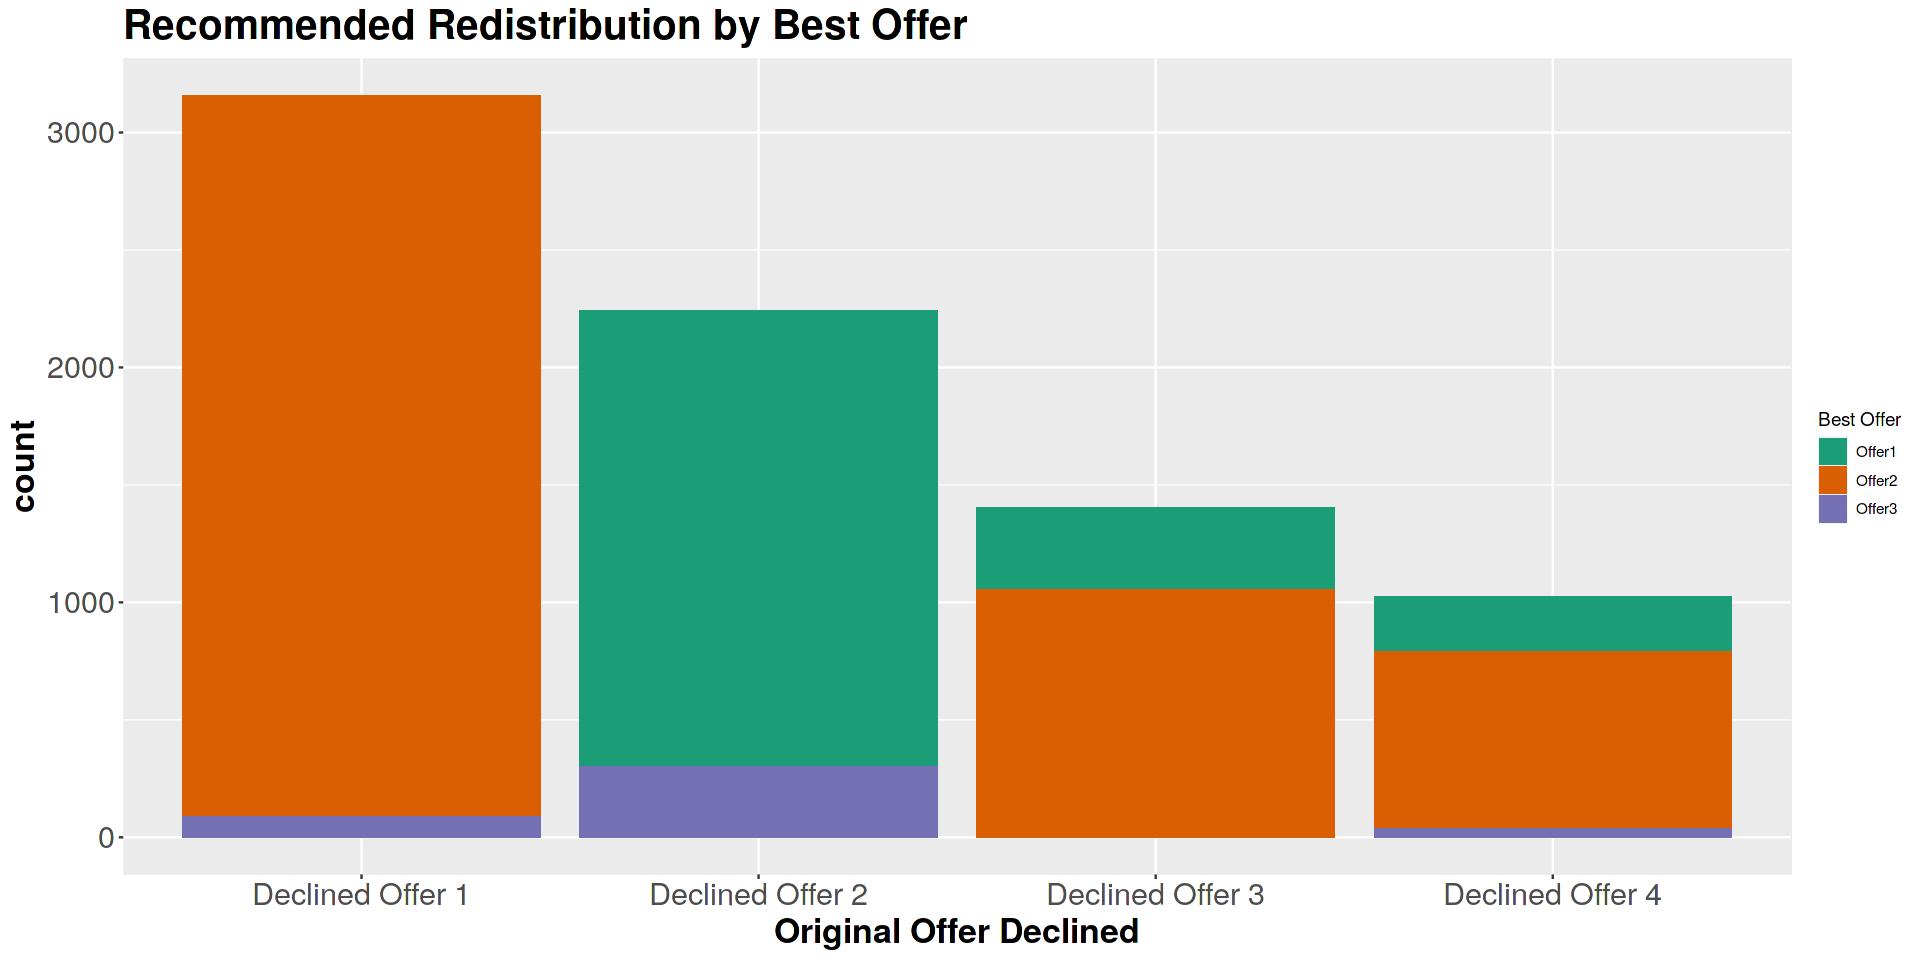

In [36]:
# Plot the redistribution of offers.

# Factor the labels for logical order of presentation
OfferRespNo$YesChance <- factor(OfferRespNo$YesChance, levels = c("< 25% Chance","25%-49% Chance",
                                                                "50%-75% Chance","> 75% Chance"))

# Plot Recommended Redistribution of offers for best possible conversion
ggplot(OfferRespNo, aes(x=Renew.Offer.Type, fill = BestOffer)) + geom_bar()+
  scale_fill_brewer(palette = "Dark2", name = "Best Offer") + labs(x="Original Offer Declined")+
  ggtitle("Recommended Redistribution by Best Offer") +
  scale_x_discrete(breaks=c("Offer1", "Offer2","Offer3","Offer4"),
                   labels = c("Declined Offer 1", "Declined Offer 2",
                   "Declined Offer 3", "Declined Offer 4")) + MyTheme

Based on the models' highest probability of a "yes" response... 
* Most customers who originally declined Offer 1  will be sent Offer 2. 
* Most customers who originally declined Offer 2 will receive Offer 1. 
* Most customers who originally declined Offer 3 and 4 will also receive Offer 2.

In [37]:
# Table figures for Probability the Best Offer will be accepted
table(Best_Offer = OfferRespNo$BestOffer,Probability_Offer_Accepted = OfferRespNo$YesChance)

          Probability_Offer_Accepted
Best_Offer < 25% Chance 25%-49% Chance 50%-75% Chance > 75% Chance
    Offer1         2412             91             15            5
    Offer2         4503            353             18            2
    Offer3          422              5              0            0

### Random Forest Takeaway
As illustrated in the table above, only 40 customers have a > 50% probability of renewing the alternative offer. The results predicted a low conversion rate upon redistribution of offers. The high accuracy and precision of the models suggest the low conversion rate may be due to other factors about the renew offer types.  It should also be noted that the models can be used to determine how to best distribute offers to future customers whose policies are due to expire. 

Given the poor responses to the renew offer types, a reexamination on the renew offer design may be needed to create offers that will achieve higher conversions.  To aid in this process cluster analysis can be used to find distinct customer segments.  The characteristics that make up the customer segments can provide insights and guidance to design renewal offers to make them more attractive to the target customers by segment. 

## **K-means Cluster Analysis: Customer Segmentation**

Customer segmentation is a method often used in marketing to find similarities between customers in order to group like customers together.  Customers can then be identified by their assigned segments. Each segment can be targeted differently in order to market the products that would best appeal to those segments, or products can be designed to appeal to those segments. 

K-means Cluster Analysis is an unsupervised learning algorithm that groups objects similar or related to one another and different or unrelated to other grouped objects. This cluster analysis will attempt to find distinct customer segments by finding similarities in their customer and policy profiles. 

The K means cluster analysis algorithm requires numerical or ordinal data. Numerical variables included in the analysis are: Income, Months Since Policy Inception, Monthly Premium Auto, Months Since Last Claim, Total Claim Amount, Number of Open Complaints, Number of Policies and Customer Lifetime Value. The following nominal variables will be converted to ordinal: Gender, Education, Marital Status, Employment Status, State, Location Code, Vehicle Size, Vehicle Class, Policy Type, Coverage, Sales Channel, Response and Renew Offer Type.  See code for details

In [38]:
# Move all continuous data into autoclust1
autoclust1 <- auto[,c(3,10,13,14,15,16,17,22)]

# Transform nominal customer profile variables into ordinal
autoclust2 <- data.frame(Education = ifelse(auto$Education == "High School or Below", 1,
                                     ifelse(auto$Education == "College", 2,
                                     ifelse(auto$Education == "Bachelor", 3,
                                     ifelse(auto$Education == "Master",4, 5)))))
autoclust2$Gender <- ifelse(auto$Gender == "F", 0, 1)
autoclust2$MaritalStatus <- ifelse(auto$Marital.Status == "Divorced", 0,
                            ifelse(auto$Marital.Status == "Single",1, 2))
autoclust2$EmployStatus <- ifelse(auto$EmploymentStatus == "Unemployed", 0,
                           ifelse(auto$EmploymentStatus == "Employed",1,
                           ifelse(auto$EmploymentStatus == "Retired", 2,
                           ifelse(auto$EmploymentStatus == "Disabled", 3, 4))))
autoclust2$State <- ifelse(auto$State == "Arizona", 0,
                    ifelse(auto$State == "California", 1,
                    ifelse(auto$State == "Nevada", 2,
                    ifelse(auto$State == "Oregon", 3, 4))))
autoclust2$Region <- ifelse(auto$Location.Code == "Rural", 0,
                     ifelse(auto$Location.Code == "Suburban", 1, 2))

# Transform nominal policy profile variables into ordinal
autoclust3 <- data.frame(PolicyType = ifelse(auto$Policy.Type == "Corporate Auto",0,
                         ifelse(auto$Policy.Type == "Personal Auto",1, 2)))
autoclust3$VehicleSize <- ifelse(auto$Vehicle.Size == "Large", 2,
                          ifelse(auto$Vehicle.Size == "Medsize", 1,0))
autoclust3$VehicleClass <-ifelse(auto$Vehicle.Class == "Four-Door Car", 0,
                          ifelse(auto$Vehicle.Class == "Luxury Car", 1,
                          ifelse(auto$Vehicle.Class == "Luxury SUV", 2,
                          ifelse(auto$Vehicle.Class == "Sports Car", 3,
                          ifelse(auto$Vehicle.Class == "Two-Door Car", 4,5)))))
autoclust3$Coverage <- ifelse(auto$Coverage == "Basic", 0,
                       ifelse(auto$Coverage == "Extended", 1, 2))
autoclust3$SChannel <- ifelse(auto$Sales.Channel == "Agent", 0,
                         ifelse(auto$Sales.Channel == "Branch", 1,
                         ifelse(auto$Sales.Channel == "Call Center", 2, 3)))
autoclust3$Response <- ifelse(auto$Response == "Yes", 1, 0)
autoclust3$RenewOffer <- ifelse(auto$Renew.Offer.Type == "Offer1", 1,
                         ifelse(auto$Renew.Offer.Type == "Offer2", 2,
                         ifelse(auto$Renew.Offer.Type == "Offer3", 3, 4)))

autoclust <- data.frame(autoclust1, autoclust2, autoclust3)

# Print first 6 rows of data frame prepared for cluster analysis
head(autoclust)

Customer.Lifetime.Value Income Monthly.Premium.Auto Months.Since.Last.Claim
1  2763.519               56274   69                  32                     
2  6979.536                   0   94                  13                     
3 12887.432               48767  108                  18                     
4  7645.862                   0  106                  18                     
5  2813.693               43836   73                  12                     
6  8256.298               62902   69                  14                     
  Months.Since.Policy.Inception Number.of.Open.Complaints Number.of.Policies
1  5                            0                         1                 
2 42                            0                         8                 
3 38                            0                         2                 
4 65                            0                         7                 
5 44                            0                         1                 
6 94                            0                         2                 
  Total.Claim.Amount Education Gender ⋯ EmployStatus State Region PolicyType
1  384.8111          3         0      ⋯ 1            4     1      0         
2 1131.4649          3         0      ⋯ 0            0     1      1         
3  566.4722          3         0      ⋯ 1            2     1      1         
4  529.8813          3         1      ⋯ 0            1     1      0         
5  138.1309          3         1      ⋯ 1            4     0      1         
6  159.3830          3         0      ⋯ 1            3     0      1         
  VehicleSize VehicleClass Coverage SChannel Response RenewOffer
1 1           4            0        0        0        1         
2 1           0            1        0        0        3         
3 1           4            2        0        0        1         
4 1           5            0        2        0        1         
5 1           0            0        0        0        1         
6 1           4            0        3        1        2

Elbow method will be used to determine optimal number of clusters by comparing the Total Within Sum Squares (wss) to the Number of Clusters. Based on the chart below, the optimal number of clusters can be sugjectively defined as 3.  This is the "bend" point in the line that indicates a "threshold" from which a greater number of clusters will be minimal differences from each other.

In [39]:
# Determine optimal number of clusters using elbow method
fviz_nbclust(autoclust, kmeans, method = "wss") + 
  geom_vline(xintercept = 3, linetype = 2) + MyTheme

Let's run the k-means algorithm with k= 3 clusters and plot a 2 dimensional visualization of the resulting clusters.

In [40]:
# Run cluster analysis with k= 3 clusters
set.seed(123)
k3 <- kmeans(autoclust, centers = 3, nstart = 25)
# Plot a 2 dimensional representation of the resulting clusters
p3 <- fviz_cluster(k3, geom = "point", data = autoclust) + ggtitle("Kmeans 3 Customer Clusters") + MyTheme
p3

## **Identify Distinct Cluster Characteristics**

The cluster results will be applied to the data. Each cluster will be explored against the variables to determine the distinctive differences between the 3 clusters. We will visualize the differences between clusters and label clusters with the following titles based on the findings:
* Leisure Working Class Provincials (Cluster 1)
* Affluent Cautiously Vigilant Drivers (Cluster 2)
* Single Out-of-Action Suburban Mavericks (Cluster 3)

In [41]:
# Apply the cluster results to the auto data
aCluster <- auto
aCluster$Clustk3 <- k3$cluster

# Create Customer Segment labels for each of the clusters
Xlabels <- scale_x_discrete(breaks=c("1", "2","3"),
                   labels = str_wrap( c("Leisure Working-Class Provincials",
                          "Affluent Cautiously Vigilant Drivers",
                          "Single Out-of-Action Suburban Mavericks"), width = 20))

# Factor the order of Employment Status
aCluster$EmploymentStatus <- factor(aCluster$EmploymentStatus, 
                                    levels = c("Employed","Medical Leave",
                                                          "Disabled","Retired","Unemployed"))

# Plot Customer Segments by Employment Status
ggplot(aCluster,aes(x=as.factor(Clustk3), fill = EmploymentStatus )) + geom_bar(position = "fill") +
  scale_y_continuous(labels = scales::percent) + 
  labs(x="Customer Segments", y= "percent", fill = "Employment Status") +
  ggtitle("Customer Segments by Employment Status") + scale_fill_brewer(palette = "YlOrBr") +
  Xlabels + MyTheme

In [42]:
# Plot Customer Segments by Location
ggplot(aCluster,aes( x=as.factor(Clustk3), fill = Location.Code)) + geom_bar(position = "fill")  +
  scale_y_continuous(labels = scales::percent) + 
  labs(x="Customer Segments", y= "percent", fill = " Location") +
  ggtitle("Customer Segments by Location") + scale_fill_brewer(palette = "Oranges")+
  Xlabels + MyTheme

In [43]:
# Factor the order of Marital Status
aCluster$Marital.Status <- factor(aCluster$Marital.Status, 
                                    levels = c("Single","Married", "Divorced"))

# Plot Customer Segments by Marital Status
ggplot(aCluster,aes( x=as.factor(Clustk3), fill = Marital.Status)) + geom_bar(position = "fill") +
  scale_y_continuous(labels = scales::percent) + 
  labs(x="Customer Segments", y= "percent", fill = "Marital Status") +
  ggtitle("Customer Segments by Marital Status") + scale_fill_brewer(palette = "YlOrRd")+
   Xlabels + MyTheme

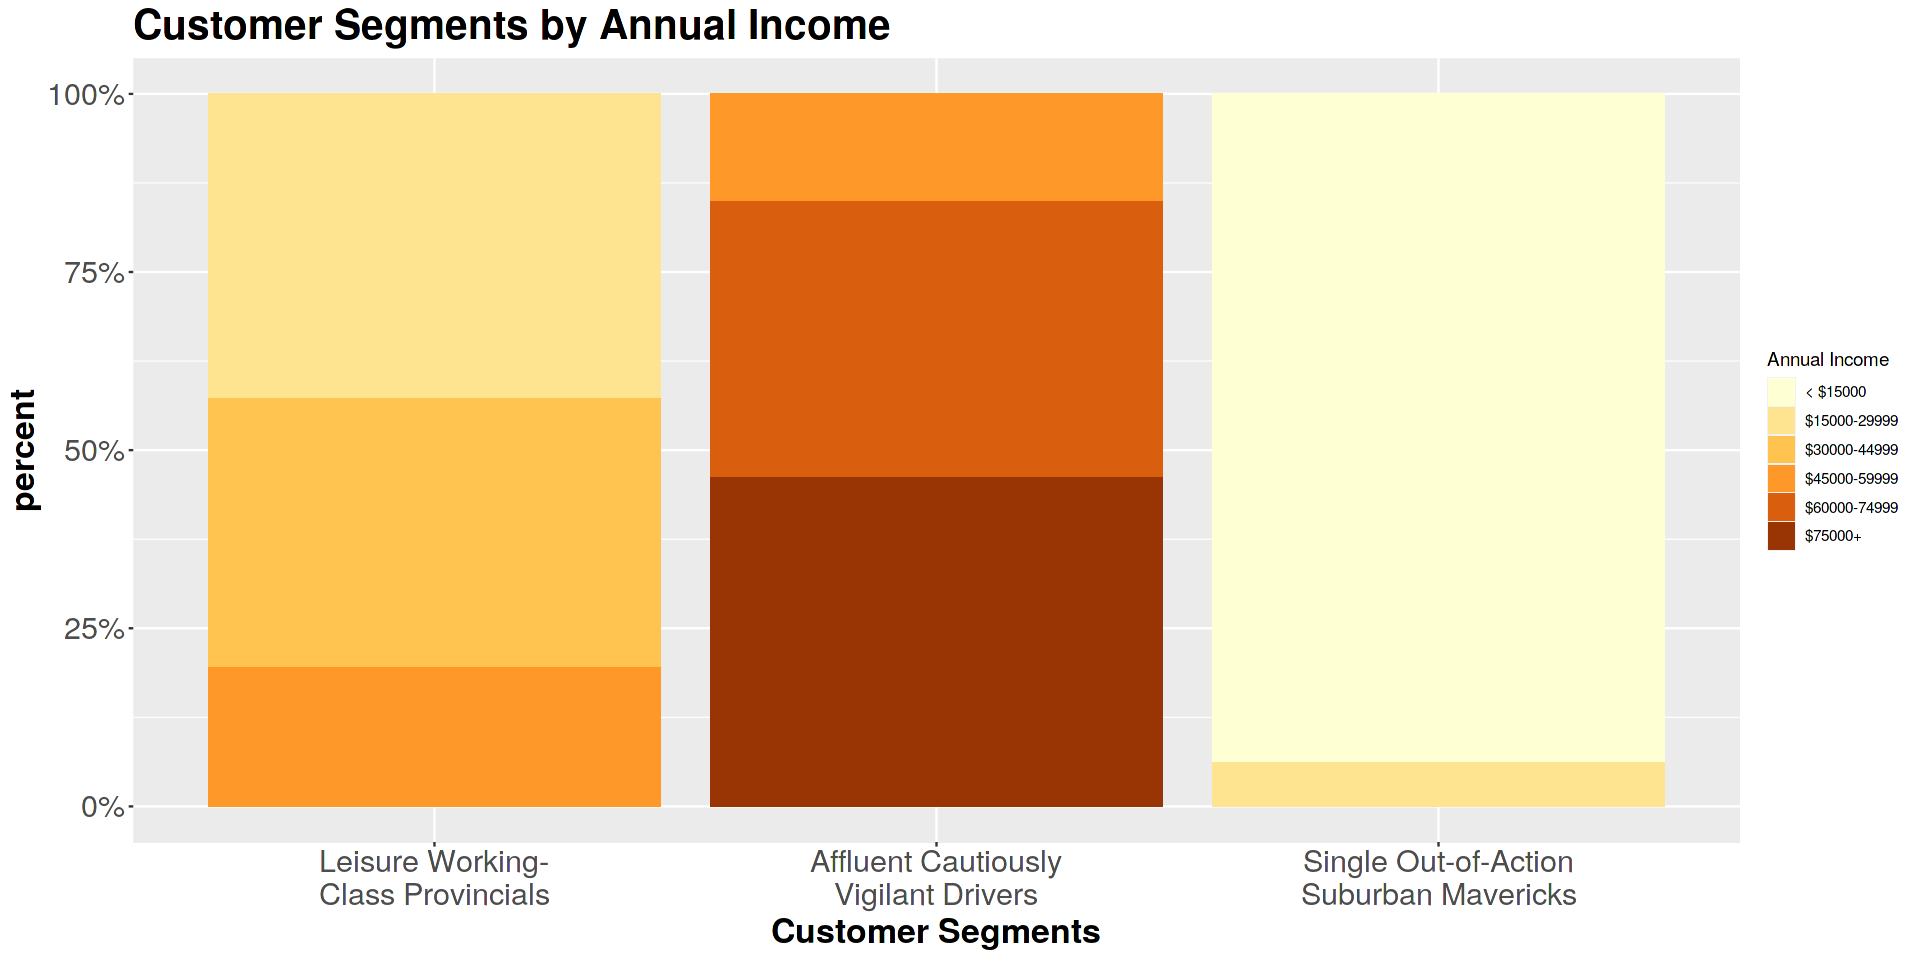

In [44]:
# Plot the Customer Segments by Income
ggplot(aCluster,aes(x=as.factor(Clustk3), fill = IncomeBin)) + geom_bar(position = "fill") +
  scale_y_continuous(labels = scales::percent) + 
  labs(x="Customer Segments", y= "percent", fill = "Annual Income") +
  ggtitle("Customer Segments by Annual Income") + scale_fill_brewer(palette = "YlOrBr")+
   Xlabels + MyTheme

In [45]:
# Factor the order of ClaimBin
aCluster$ClaimBin <- factor(aCluster$ClaimBin, levels = c("< $250","$250-499",
                                                          "$500-749","$750-999","$1000+"))

# Plot Customer Segments by Total Claim Amount
ggplot(aCluster,aes(x=as.factor(Clustk3), fill = ClaimBin)) + geom_bar(position = "fill") +
  scale_y_continuous(labels = scales::percent) + 
  labs(x="Customer Segments", y= "percent", fill = "Total Claim Amount") +
  ggtitle("Customer Segments by Total Claim Amount") + scale_fill_brewer(palette = "YlOrRd")+
   Xlabels + MyTheme

### K-means Cluster Analysis Takeaway
Five key characteristics distinctly defined each customer segment: Employment Status, Location, Marital Status, Annual Income and Total Claim Amount. Below is a summary description of each segment based on the results seen in the charts above.

1. CLUSTER 1: LEISURE WORKING-CLASS PROVINCIALS
    1. Disabled, Medical Leave, Retired, Employed
    1. Mostly Suburban
    1. Income 15k-60k
1. CLUSTER 2: AFFLUENT CAUTIOUSLY VIGILANT DRIVERS
    1. Employed
    1. Income: 45k or more
    1. Low Accident Claims
1. CLUSTER 3: SINGLE OUT-OF-ACTION SUBURBAN MAVERICKS
    1. Unemployed, Disabled, Medical Leave, Retired
    1. Mostly Single
    1. Suburban
    1. Income: < 30k
    1. High Accident Claim
    
These customer segment insights could be used to improve the renewal offer designs to be made more appealing to each customer segment.

## **Decision Tree Classification: Predicting Customer Lifetime Value (CLV)**

One of the key factors to CLV is the length of time a customer is retained. Identifying prospective customers as Low or High CLV prospects is one method of improving customer retention.

Decision Tree Classification is a supervised learning algorithm that can be used to predict a prospective customer's CLV.  The following CLV levels have been defined during the Apriori ARM section of this analysis. These will represent the response variables for the model.

* Low CLV = < 5000
* Avg. CLV = 5000 to 8000
* High CLV = 8001 to 15000
* Super CLV = > 15000

The predictor variables will be the following customer and policy profile variables collected in the application process: State, Coverage, Education, Employment Status, Gender, Income, Location Code, Marital Status, Monthly Premium Auto, Policy Type, Number of Policies, Policy, Sales Channel, Vehicle Class and Vehicle Size. 


In [46]:
# Prep the data for use with rpart decision tree algorithm

# create data frame with the predictor and response variables
autoDT <- auto[,c(2,5,6,8,9,10,11,12,13,17,18,19,21,23,24,29)]

# autoDT 80/20 split train and test 
set.seed(123)
sample8020 <- createDataPartition(autoDT$CLV_Levels, p=0.80,list = FALSE)
DTtrain8020 <- autoDT[sample8020,]
DTtest8020 <- autoDT[-sample8020,]

The caret package was utilized to perform a 15 fold cross validation on the train data to assess model's accuracy and to find best complexity parameter (cp) value for pruning.  Confusion matrix of the best accuracy for the model was 87.1% with cp = 0.001985.  A visualization of the cross validation results by accuracy and complexity parameter are plotted below.

Cross-Validated (15 fold) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
           Reference
Prediction  Avg_CLV High_CLV Low_CLV Super_CLV
  Avg_CLV      26.3      1.5     1.2       1.8
  High_CLV      1.1     20.0     0.0       4.8
  Low_CLV       1.3      0.0    36.8       0.0
  Super_CLV     0.1      1.2     0.0       4.0
                            
 Accuracy (average) : 0.8707


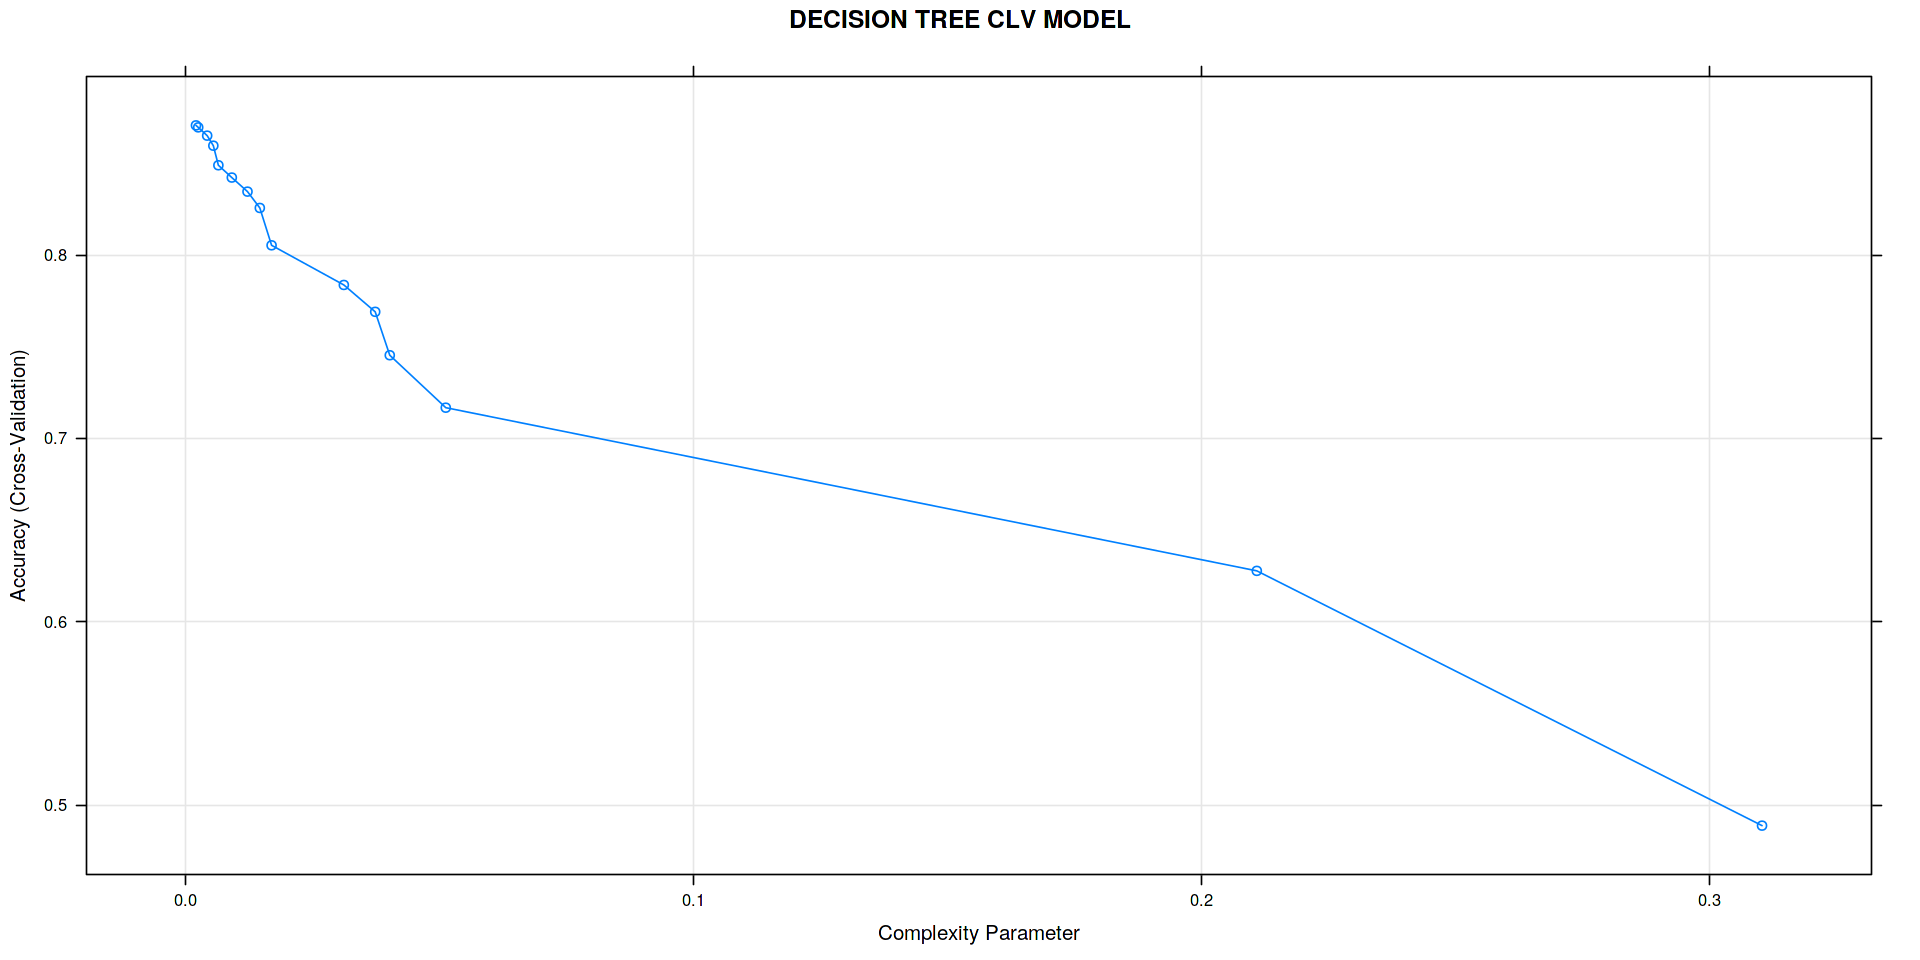

In [47]:
# Fit the model on the training sets
set.seed(123)
DTmodel8020 <- train(CLV_Levels~., data = DTtrain8020 , method = "rpart",
                trControl = trainControl("cv", number = 15),
                tuneLength = 15)

# Plot model accuracy vs different values of cp
figsize(16,8)
plot(DTmodel8020, main = "DECISION TREE CLV MODEL", cex.main = 3, cex.lab = 2)

# Print the confusion matrix for the model
confusionMatrix(DTmodel8020)

The best fit model had an 85.7% accuracy at predicting the test data. The low difference in accuracy between the train (87.1%) and test (85.7%) suggests low signs of over fitting.  The precision values for each of the 4 levels predicted were all above 71%. Recall value for Super_CLV was a low 29.4% meaning less than a third of actual Super_CLV in the data were captured as Super_CLV in the prediction. However the majority of the misidentified Super_CLV did fall in the High_CLV prediction bin (see confusion matrix). All other levels had recalls above 87%. 

Precision Results: Percent of target values that were correctly predicted
* Low_CLV = 97.2%
* Avg_CLV = 84.3%
* High_CLV = 71.8%
* Super_CLV = 83.8%

Recall Results: Percent of target values that were caught
* Low_CLV = 95.4%
* Avg_CLV = 92.4%
* High_CLV = 87.2%
* Super_CLV = 29.4%

Confusion matrix provided below.


In [48]:
# Model prediction on test
set.seed(123)
DTpredict8020 <- predict(DTmodel8020,DTtest8020)

# Confusion Matrix on results
table(Actual = DTtest8020$CLV_Levels, Predict = DTpredict8020 )

           Predict
Actual      Avg_CLV High_CLV Low_CLV Super_CLV
  Avg_CLV       484       21      19         0
  High_CLV       42      362       0        11
  Low_CLV        32        0     661         0
  Super_CLV      16      121       0        57

A model trained on the full data set will be used to visualize the final model.

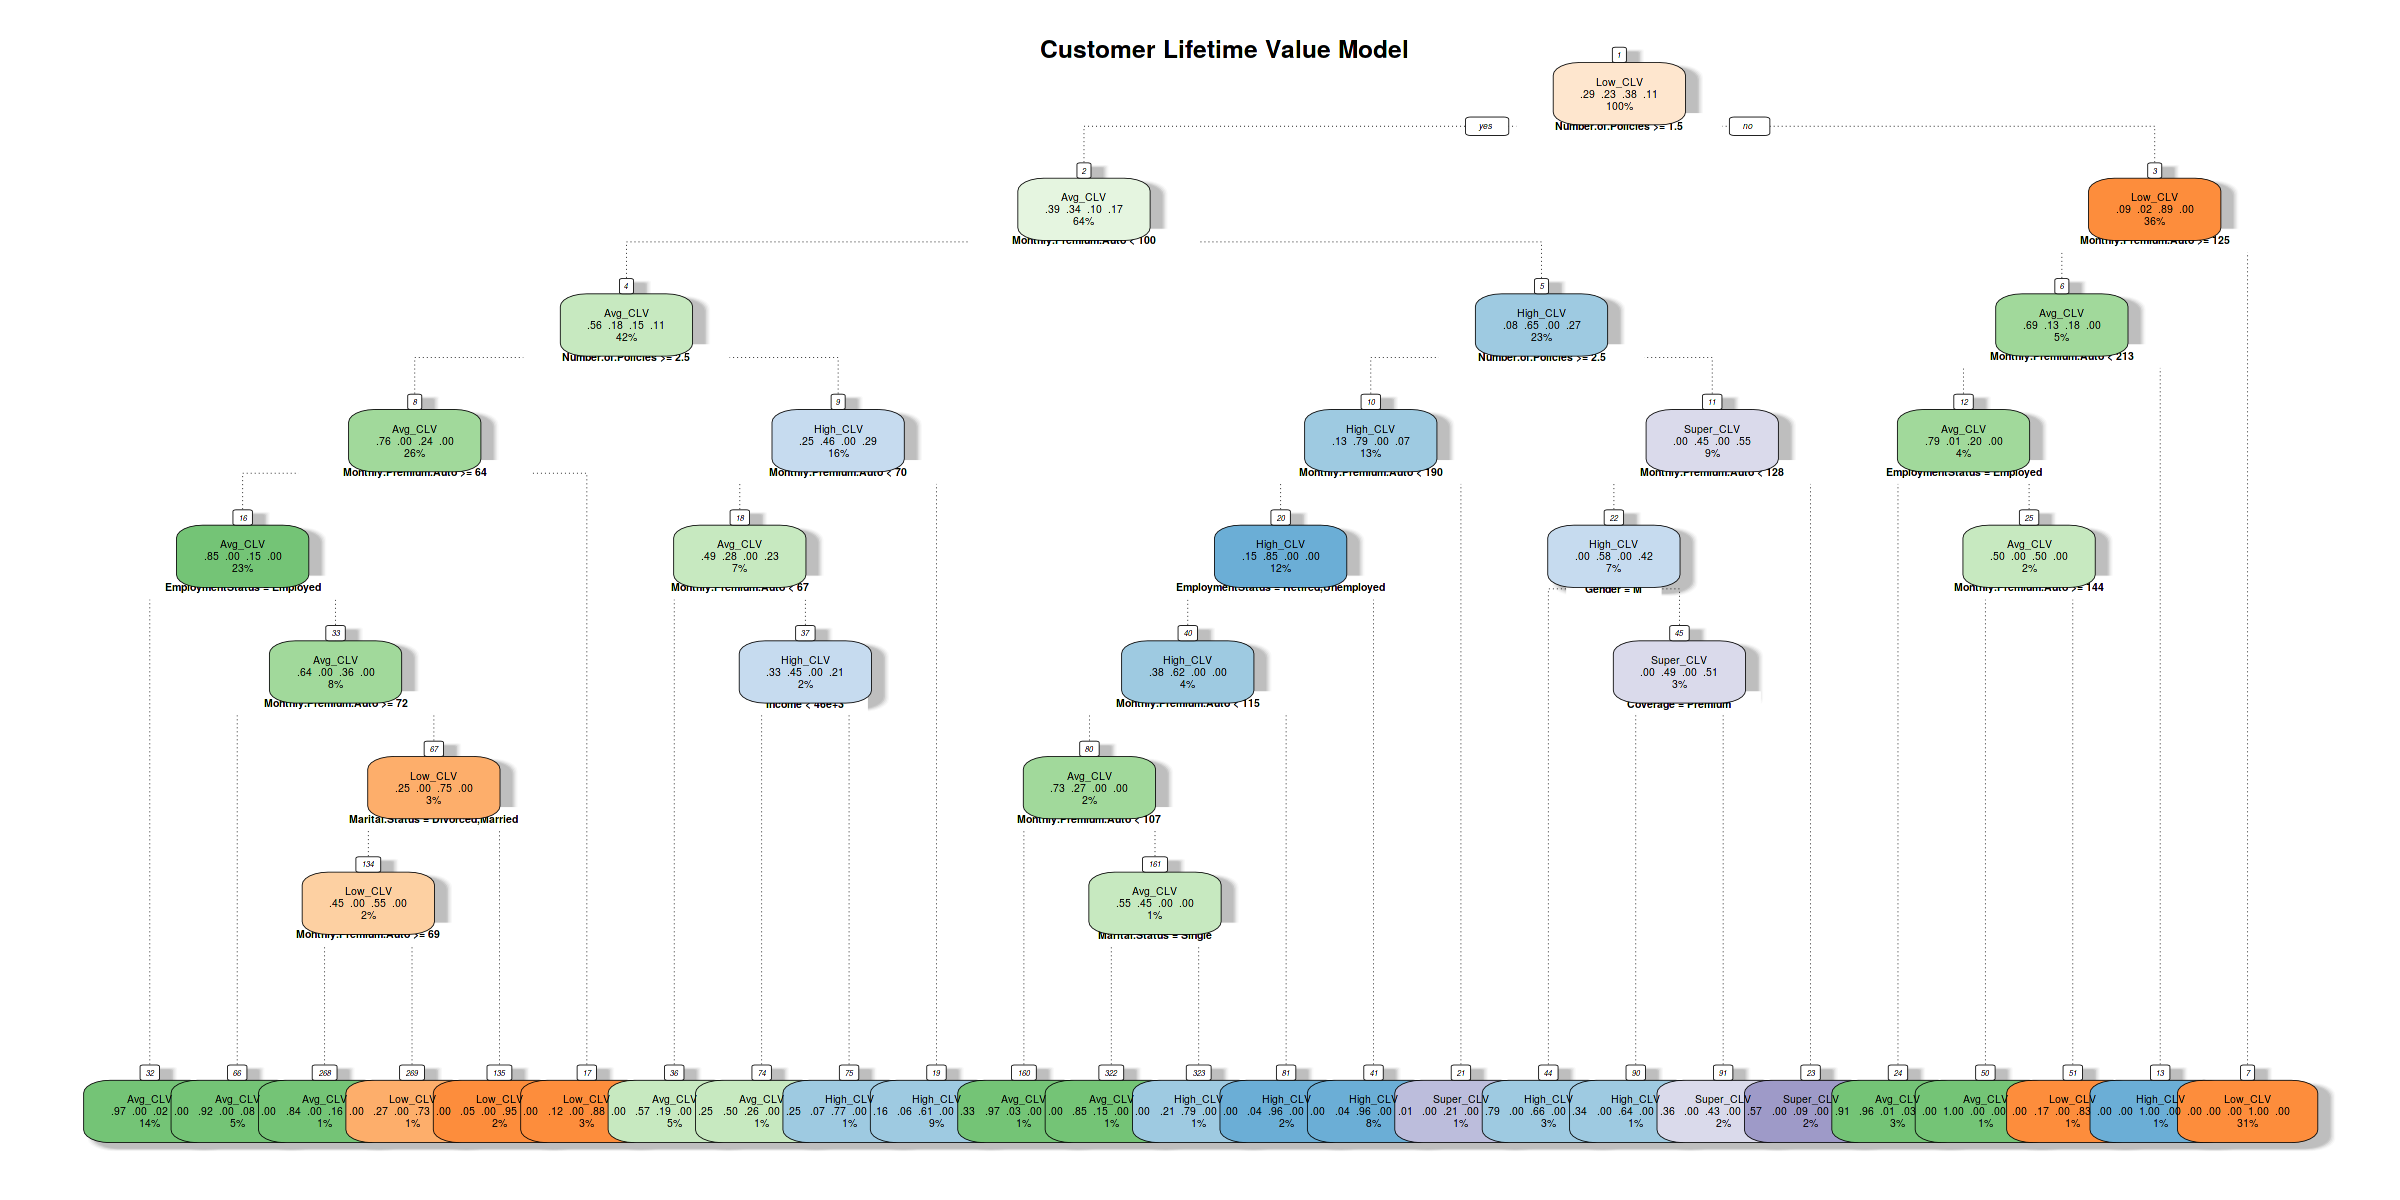

In [49]:
# Train the model on the entire dataset for a final model.
set.seed(123)
CLV_model <- rpart(CLV_Levels~.,data = autoDT, method = "class", cp = 0.001984564)

# Plot the model
figsize(20,10)
fancyRpartPlot(CLV_model, main = "Customer Lifetime Value Model", sub = "", cex = 0.5)

## **Analysis Summary**

The auto insurance company in the data contained low conversion rates for its renew offer types and required data analysis to improve customer retention. The following supervised and unsupervised models were used to provide insights and predictive tools for improved customer retention. 

* ASSOCIATION RULE MINING to identify key customer profile characteristics associated with 'Yes' responses to renew offer types. 
* RANDOM FOREST CLASSIFICATION to create a predictive model to best distribute renew offer types with the highgest probable conversion rate. 
* KMEANS CLUSTERING ANALYSIS  to identity three customer segments as key targets for new and improved renew offer designs.
* DECISION TREE ANALYSIS to identify the Customer Lifetime Value of prospective customers. 

### If you liked this post or learned something new, consider giving me an UPVOTE.  Thank you.
